* Import Requried Liberaries and frameworks

In [1]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import warnings   as w
import tensorflow as tf
import missingno  as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt
from tensorflow      import keras
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



* Set some instructures and Rules

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [20 , 20 ]} , font_scale = 1.9)


In [3]:
# Loading data ::
df = pd.read_csv("auto-mpg.csv.xls")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe(include="number")

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.describe(include="object")

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [9]:
for col in df.columns :
    print(f"The Col :: {col}\n")
    print(f"The unique_values of {col} :: {df[col].unique()}")
    print(f"The Values_counts of {col} :\n: {df[col].value_counts()}")
    print("*" * 80)

The Col :: mpg

The unique_values of mpg :: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
The Values_counts of mpg :
: 13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.5     1
19.1     1
33.8     1
28.1     1
31.8     1
Name: mpg, Length: 129, dtype: int64
********************************************************************************
The Col :: cylinders

The unique_

In [10]:
def get_orign_label(x) :
    if x == 1 :
        return "USA"
    elif x == 2 :
        return "Europe"
    else : return "Japan"
df["Orign_label"] = df["origin"].apply(get_orign_label)
df[["Orign_label"]]

,Orign_label
0,USA
1,USA
2,USA
3,USA
4,USA
...,...
393,USA
394,Europe
395,USA
396,USA


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   Orign_label   398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


In [12]:
df["horsepower"] = pd.to_numeric(df["horsepower"] , errors= "coerce")

In [13]:
df[df["mpg"] == df["mpg"].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc,Japan


In [14]:
df[df["mpg"] == df["mpg"].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d,USA


In [15]:
df[df["displacement"] == df["displacement"].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,USA
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw),USA
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,USA


In [16]:
df[df["displacement"] == df["displacement"].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
117,29.0,4,68.0,49.0,1867,19.5,73,2,fiat 128,Europe


In [17]:
df[df["horsepower"] == df["horsepower"].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix,USA


In [18]:
df[df["horsepower"] == df["horsepower"].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
19,26.0,4,97.0,46.0,1835,20.5,70,2,volkswagen 1131 deluxe sedan,Europe
102,26.0,4,97.0,46.0,1950,21.0,73,2,volkswagen super beetle,Europe


In [19]:
df[df["weight"] == df["weight"].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
44,13.0,8,400.0,175.0,5140,12.0,71,1,pontiac safari (sw),USA


In [20]:
df[df["weight"] == df["weight"].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
54,35.0,4,72.0,69.0,1613,18.0,71,3,datsun 1200,Japan


In [21]:
df[df["acceleration"] == df["acceleration"].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504,Europe


In [22]:
df[df["acceleration"] == df["acceleration"].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340,USA


In [23]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Orign_label
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,USA
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,USA


In [24]:
df.groupby("Orign_label").describe().transpose()


Orign_label      Europe      Japan         USA
mpg    count  70.000000  79.000000  249.000000
       mean   27.891429  30.450633   20.083534
       std     6.723930   6.090048    6.402892
       min    16.200000  18.000000    9.000000
       25%    24.000000  25.700000   15.000000
...                 ...        ...         ...
origin min     2.000000   3.000000    1.000000
       25%     2.000000   3.000000    1.000000
       50%     2.000000   3.000000    1.000000
       75%     2.000000   3.000000    1.000000
       max     2.000000   3.000000    1.000000

[64 rows x 3 columns]

In [25]:
df.groupby("model year").describe().transpose()


model year                   70           71           72           73  \
mpg          count    29.000000    28.000000    28.000000    40.000000   
             mean     17.689655    21.250000    18.714286    17.100000   
             std       5.339231     6.591942     5.435529     4.700245   
             min       9.000000    12.000000    11.000000    11.000000   
             25%      14.000000    15.500000    13.750000    13.000000   
             50%      16.000000    19.000000    18.500000    16.000000   
             75%      22.000000    27.000000    23.000000    20.000000   
             max      27.000000    35.000000    28.000000    29.000000   
cylinders    count    29.000000    28.000000    28.000000    40.000000   
             mean      6.758621     5.571429     5.821429     6.375000   
             std       1.724926     1.665079     2.073708     1.807215   
             min       4.000000     4.000000     3.000000     3.000000   
             25%       6.000000     4.000000     4.000000     4.000000   
             50%       8.000000     6.000000     4.000000     7.000000   
             75%       8.000000     6.500000     8.000000     8.000000   
             max       8.000000     8.000000     8.000000     8.000000   
displacement count    29.000000    28.000000    28.000000    40.000000   
             mean    281.413793   209.750000   218.375000   256.875000   
             std     124.421380   115.102410   123.781964   121.722085   
             min      97.000000    71.000000    70.000000    68.000000   
             25%     198.000000    97.750000   109.250000   121.750000   
             50%     307.000000   228.500000   131.000000   276.000000   
             75%     383.000000   273.000000   326.000000   350.250000   
             max     455.000000   400.000000   429.000000   455.000000   
horsepower   count    29.000000    27.000000    28.000000    40.000000   
             mean    147.827586   107.037037   120.178571   130.475000   
             std      53.734844    38.566109    41.121368    46.412304   
             min      46.000000    60.000000    54.000000    46.000000   
             25%      95.000000    81.000000    86.750000    93.250000   
             50%     150.000000    95.000000   104.500000   129.500000   
             75%     198.000000   130.000000   150.750000   160.250000   
             max     225.000000   180.000000   208.000000   230.000000   
weight       count    29.000000    28.000000    28.000000    40.000000   
             mean   3372.793103  2995.428571  3237.714286  3419.025000   
             std     852.868663  1061.830859   974.520960   974.809133   
             min    1835.000000  1613.000000  2100.000000  1867.000000   
             25%    2648.000000  2110.750000  2285.500000  2554.500000   
             50%    3449.000000  2798.000000  2956.000000  3338.500000   
             75%    4312.000000  3603.250000  4169.750000  4247.250000   
             max    4732.000000  5140.000000  4633.000000  4997.000000   
acceleration count    29.000000    28.000000    28.000000    40.000000   
             mean     12.948276    15.142857    15.125000    14.312500   
             std       3.330982     2.666171     2.850032     2.754222   
             min       8.000000    11.500000    11.000000     9.500000   
             25%      10.000000    13.375000    13.375000    12.500000   
             50%      12.500000    14.500000    14.500000    14.000000   
             75%      15.000000    16.125000    16.625000    16.000000   
             max      20.500000    20.500000    23.500000    21.000000   
origin       count    29.000000    28.000000    28.000000    40.000000   
             mean      1.310345     1.428571     1.535714     1.375000   
             std       0.603765     0.741798     0.792658     0.667467   
             min       1.000000     1.000000     1.000000     1.000000   
             25%       1.000000     1.000000     1.000000     1.000000   
    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   Orign_label   398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [27]:
PT = pd.pivot_table(df , index="model year" , columns="Orign_label" , values="horsepower")
PT

Orign_label,Europe,Japan,USA
model year,,,
70,86.200000,91.500000,166.954545
71,74.000000,79.250000,119.842105
72,79.600000,93.800000,138.777778
73,81.857143,98.500000,146.620690
74,74.166667,72.500000,112.142857
75,89.500000,80.250000,108.700000
76,87.625000,76.500000,110.500000
77,81.000000,81.166667,118.388889
78,99.166667,79.250000,107.272727


In [28]:
PT = pd.pivot_table(df , index="model year" , columns="Orign_label" , values="weight")
PT

Orign_label,Europe,Japan,USA
model year,,,
70,2309.200000,2251.000000,3716.500000
71,2024.000000,1936.000000,3401.600000
72,2573.200000,2300.400000,3682.666667
73,2335.714286,2397.250000,3821.448276
74,2139.333333,2053.000000,3503.333333
75,2571.166667,2303.250000,3533.200000
76,2611.000000,2217.500000,3405.409091
77,2138.750000,2295.833333,3422.000000
78,2691.666667,2221.250000,3141.136364


In [29]:
PT = pd.pivot_table(df , index="model year" , columns="Orign_label" , values="displacement")
PT

Orign_label,Europe,Japan,USA
model year,,,
70,107.800000,105.000000,336.909091
71,95.000000,88.250000,257.000000
72,111.000000,99.400000,281.250000
73,105.000000,107.750000,314.103448
74,93.166667,89.500000,236.066667
75,109.500000,110.250000,253.400000
76,116.125000,107.250000,243.954545
77,98.500000,100.500000,242.333333
78,126.166667,107.250000,217.545455


In [30]:
PT = pd.pivot_table(df , index="model year" , columns="Orign_label" , values="mpg")
PT

Orign_label,Europe,Japan,USA
model year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


In [31]:
PT = pd.pivot_table(df , index="model year" , columns="Orign_label" , values="cylinders")
PT

Orign_label,Europe,Japan,USA
model year,,,
70,4.000000,4.000000,7.636364
71,4.000000,4.000000,6.200000
72,4.000000,3.800000,6.888889
73,4.000000,4.250000,7.241379
74,4.000000,4.000000,6.266667
75,4.000000,4.000000,6.400000
76,4.250000,4.500000,6.363636
77,4.000000,4.166667,6.222222
78,4.833333,4.000000,6.000000


In [32]:
Con_Matrix = df.corr()
Con_Matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [33]:
df.duplicated().sum()

0

,Missing_Num,Missing_Precent
horsepower,6,0.015075
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
weight,0,0.000000
acceleration,0,0.000000
model year,0,0.000000
origin,0,0.000000
car name,0,0.000000
Orign_label,0,0.000000


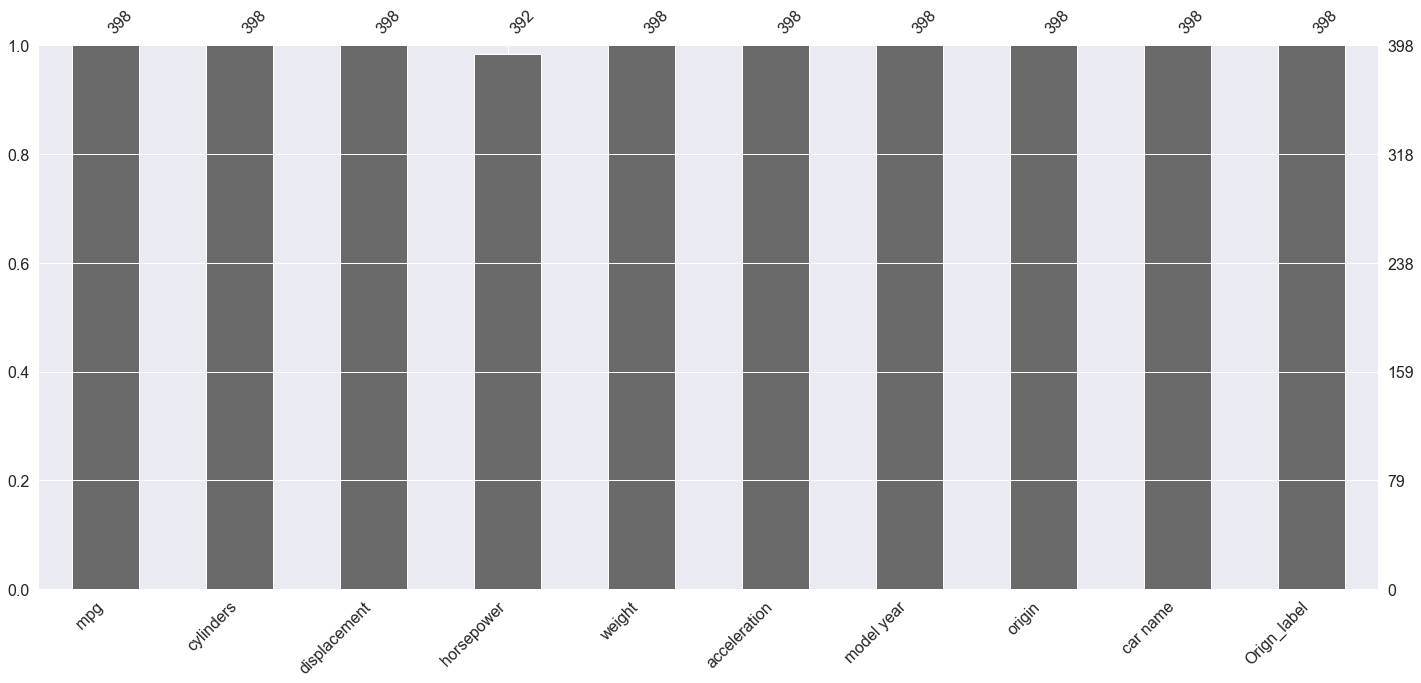

In [34]:
Num_Missing  = df.isnull().sum().sort_values(ascending = False)
Pre_Missing  = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
Missing_data = pd.concat([Num_Missing , Pre_Missing] , axis=1 , keys=["Missing_Num" , "Missing_Precent"])
mno.bar(df)
Missing_data

In [35]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Confusion_Matrix of data')

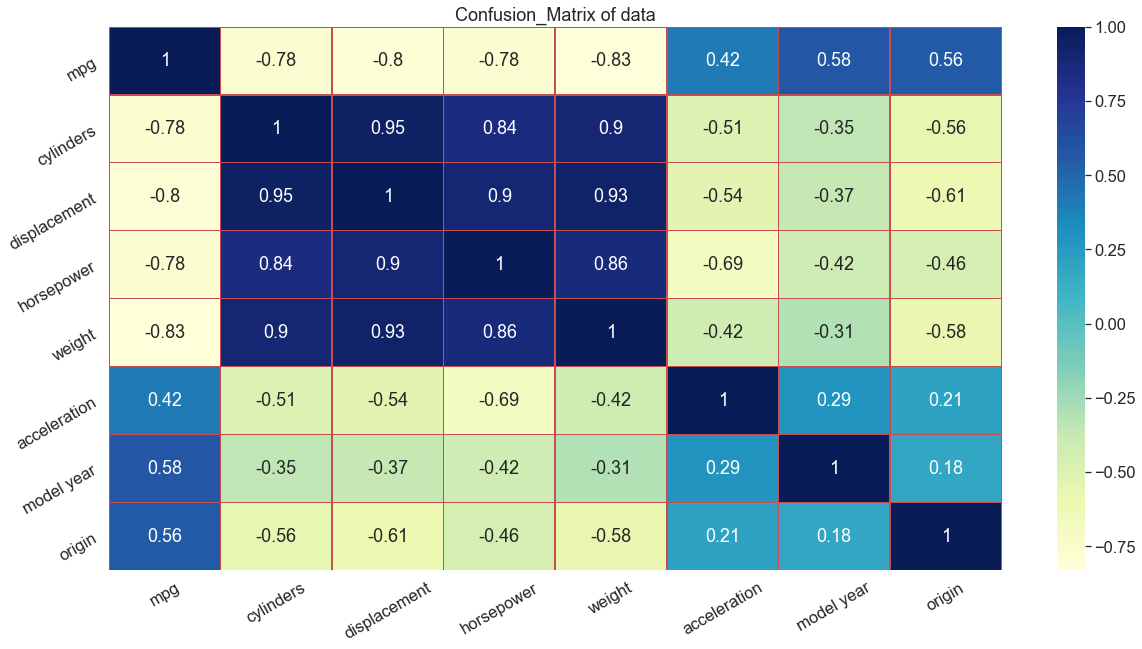

In [36]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   Orign_label   392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 33.7+ KB


<AxesSubplot:xlabel='mpg'>

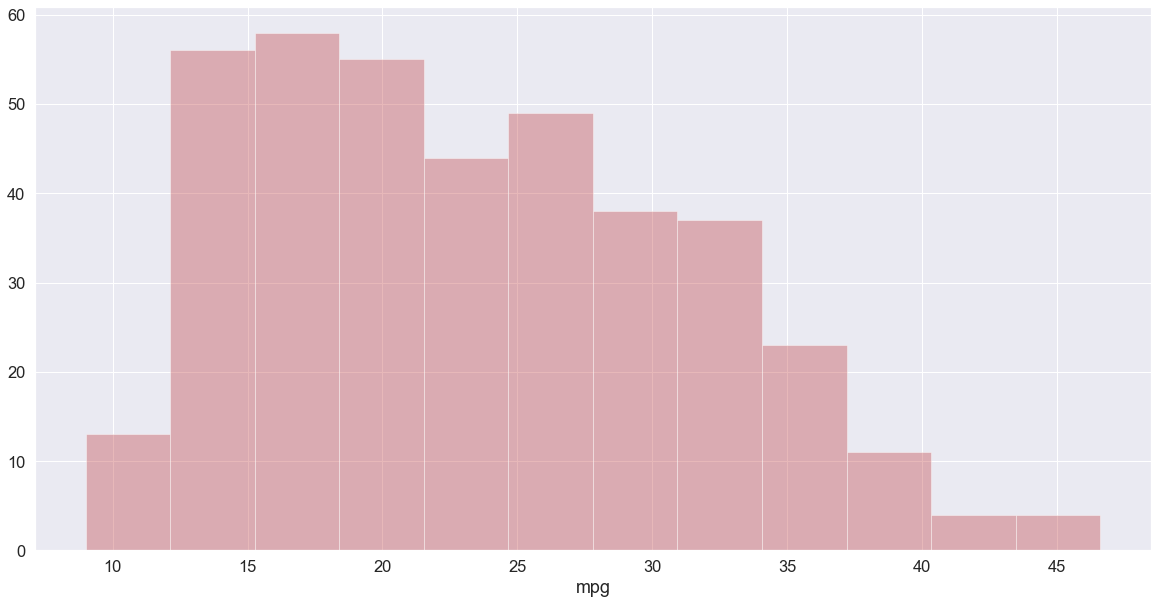

In [38]:
# identify The auto mpg distribution 
sns.distplot(df["mpg"] , kde=False , color="r")

<AxesSubplot:xlabel='mpg', ylabel='Density'>

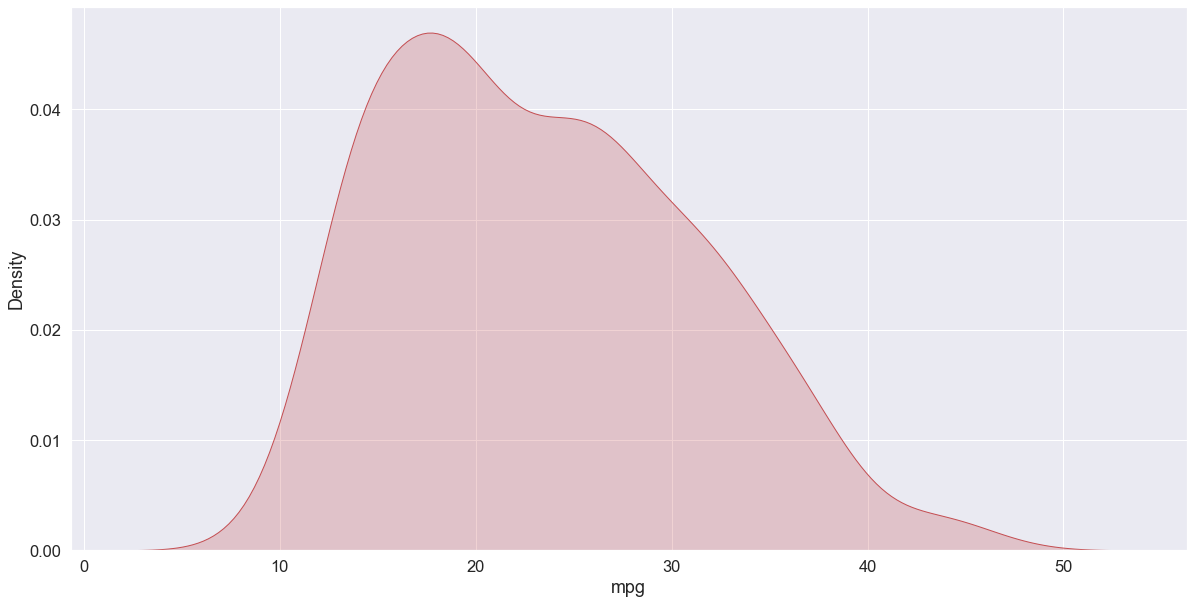

In [39]:
sns.kdeplot(df["mpg"] , shade=True , color="r")


<AxesSubplot:xlabel='displacement'>

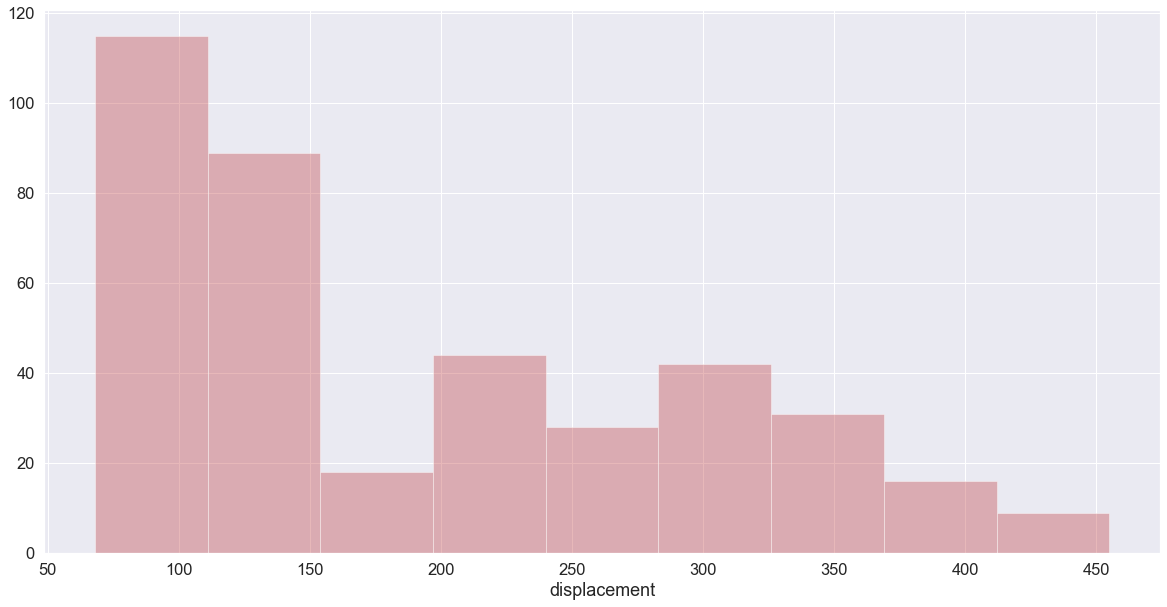

In [40]:
# identify The auto displacement distribution 
sns.distplot(df["displacement"] , kde=False , color="r")

<AxesSubplot:xlabel='displacement', ylabel='Density'>

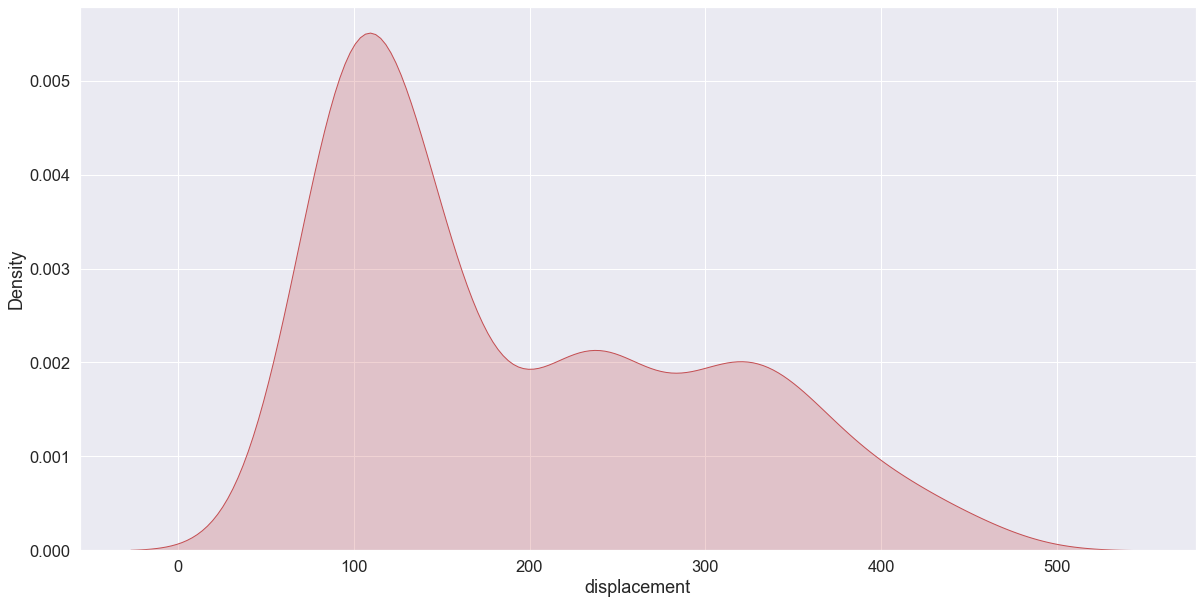

In [41]:
sns.kdeplot(df["displacement"] , shade=True , color="r")


<AxesSubplot:xlabel='horsepower'>

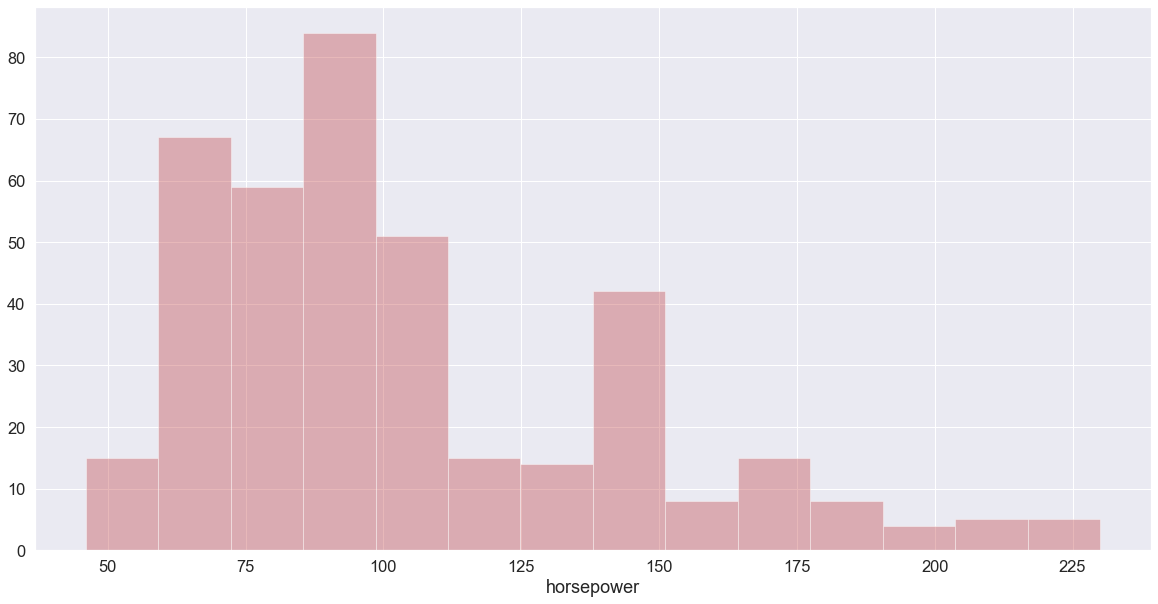

In [42]:
# identify The auto horsepower distribution 
sns.distplot(df["horsepower"] , kde=False , color="r")

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

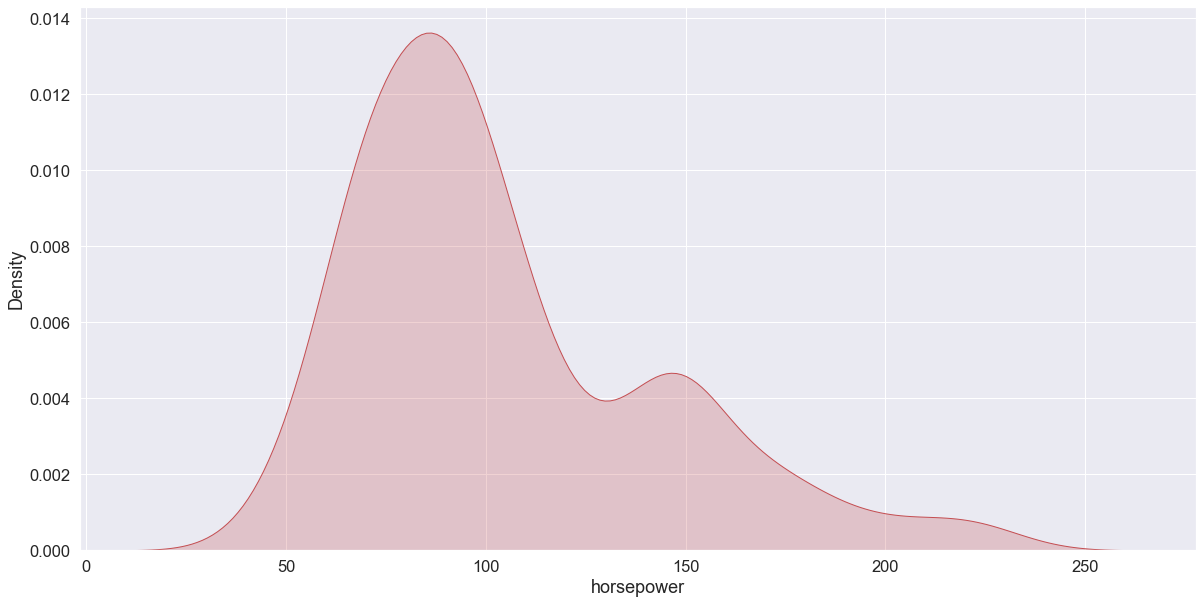

In [43]:
sns.kdeplot(df["horsepower"] , shade=True , color="r")


<AxesSubplot:xlabel='weight'>

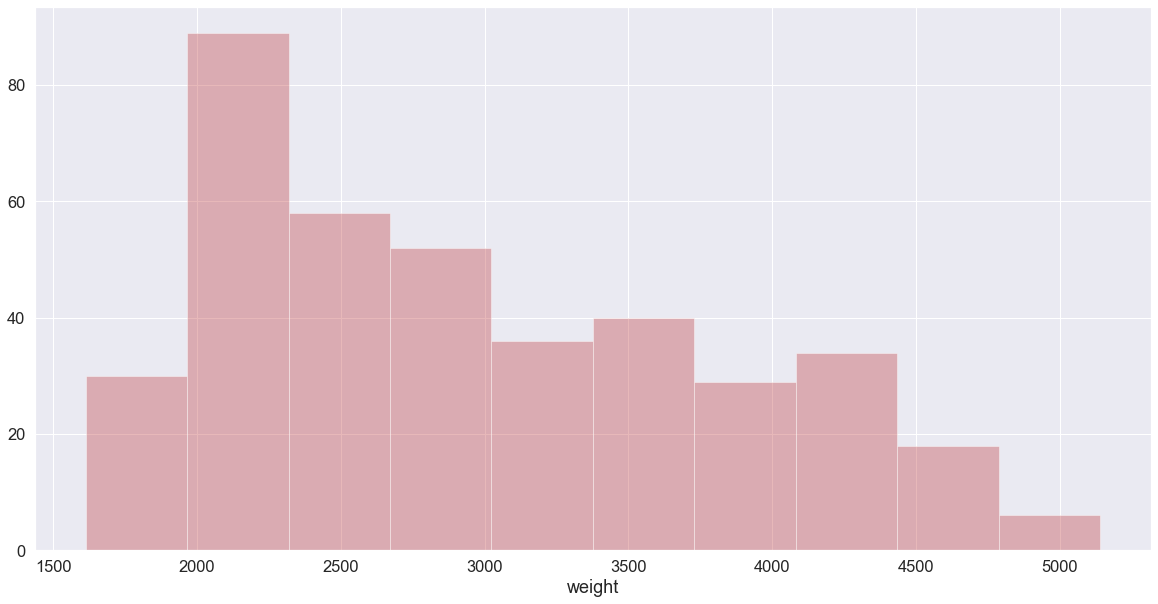

In [44]:
# identify The auto weight distribution 
sns.distplot(df["weight"] , kde=False , color="r")

<AxesSubplot:xlabel='weight', ylabel='Density'>

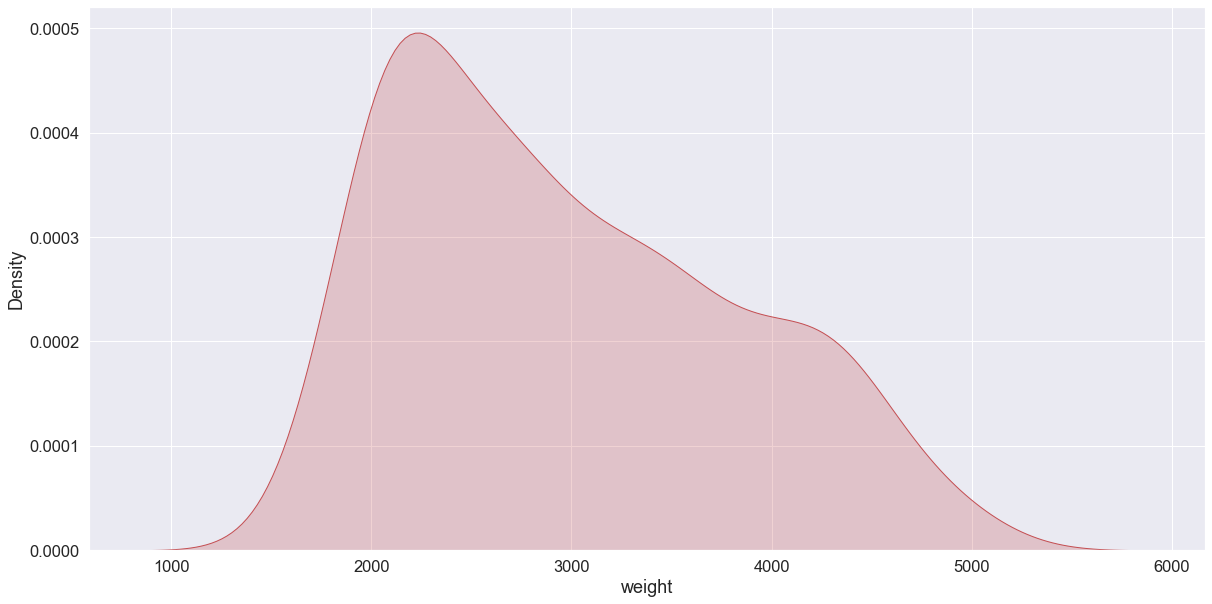

In [45]:
sns.kdeplot(df["weight"] , shade=True , color="r")


<AxesSubplot:xlabel='acceleration'>

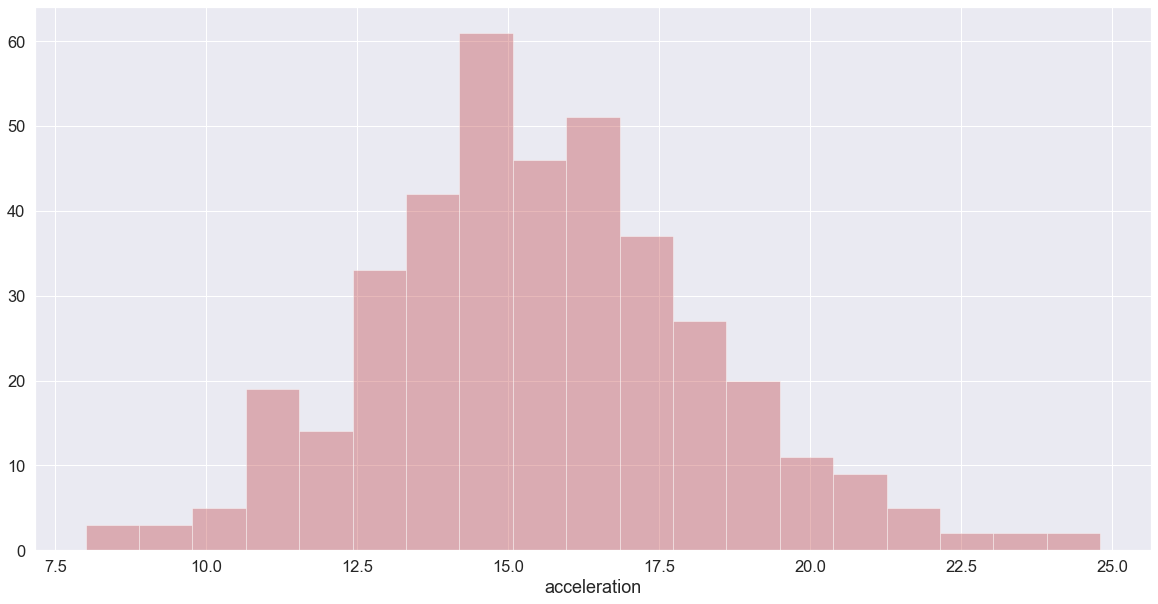

In [46]:
# identify The auto acceleration distribution 
sns.distplot(df["acceleration"] , kde=False , color="r")

<AxesSubplot:xlabel='acceleration', ylabel='Density'>

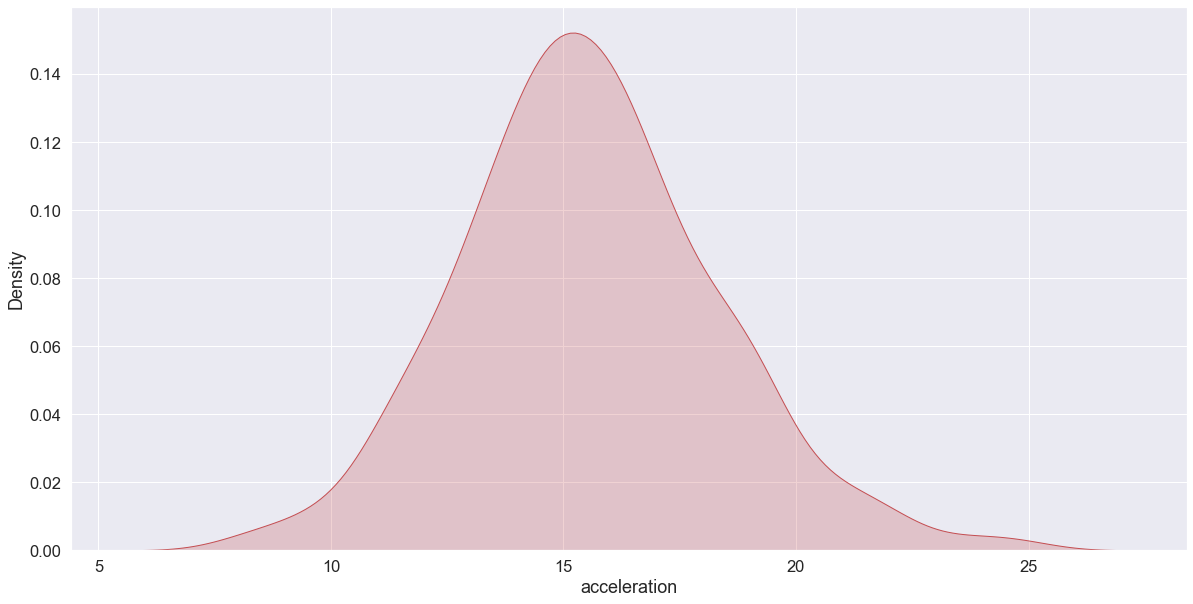

In [47]:
sns.kdeplot(df["acceleration"] , shade=True , color="r")


<AxesSubplot:xlabel='cylinders'>

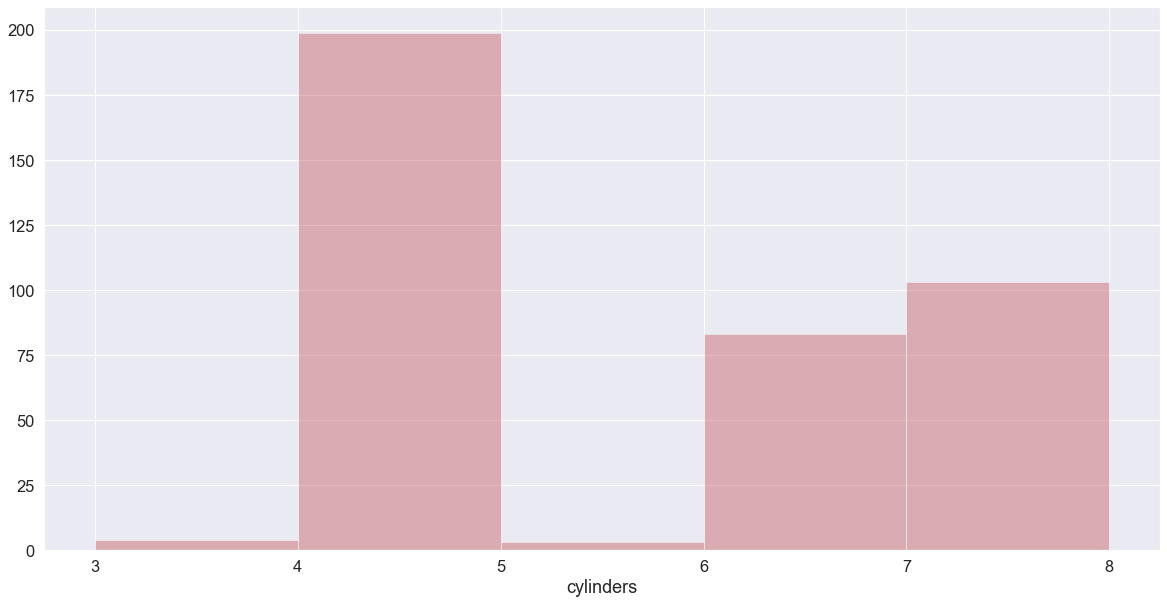

In [48]:
# identify The auto cylinders distribution 
sns.distplot(df["cylinders"] , kde=False , color="r")

<AxesSubplot:xlabel='cylinders', ylabel='Density'>

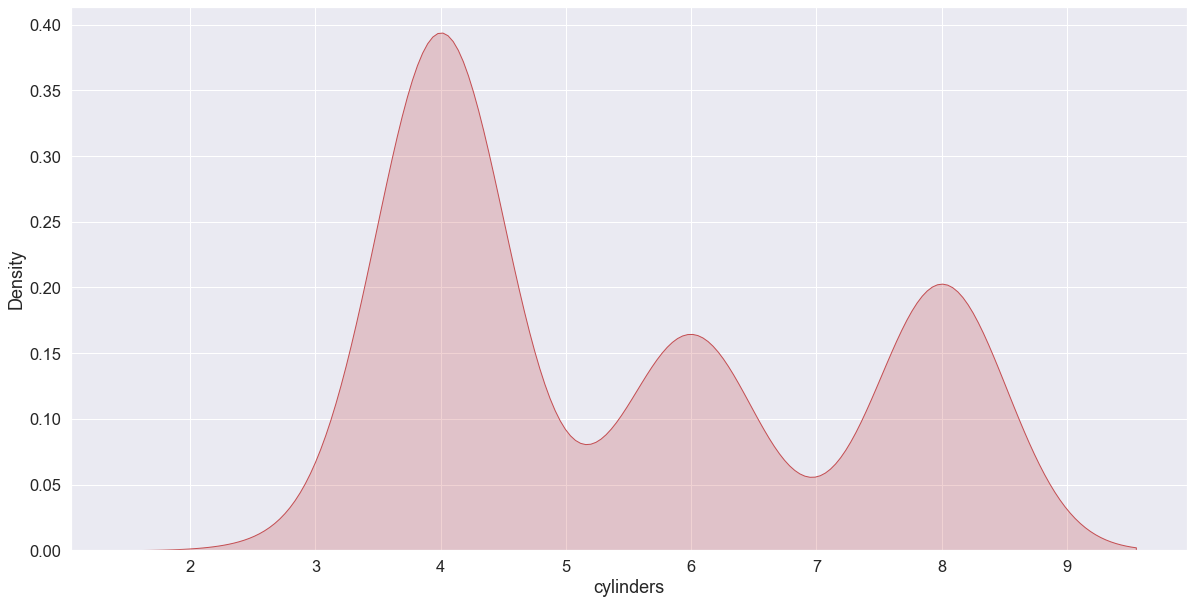

In [49]:
sns.kdeplot(df["cylinders"] , shade=True , color="r")

<AxesSubplot:xlabel='model year'>

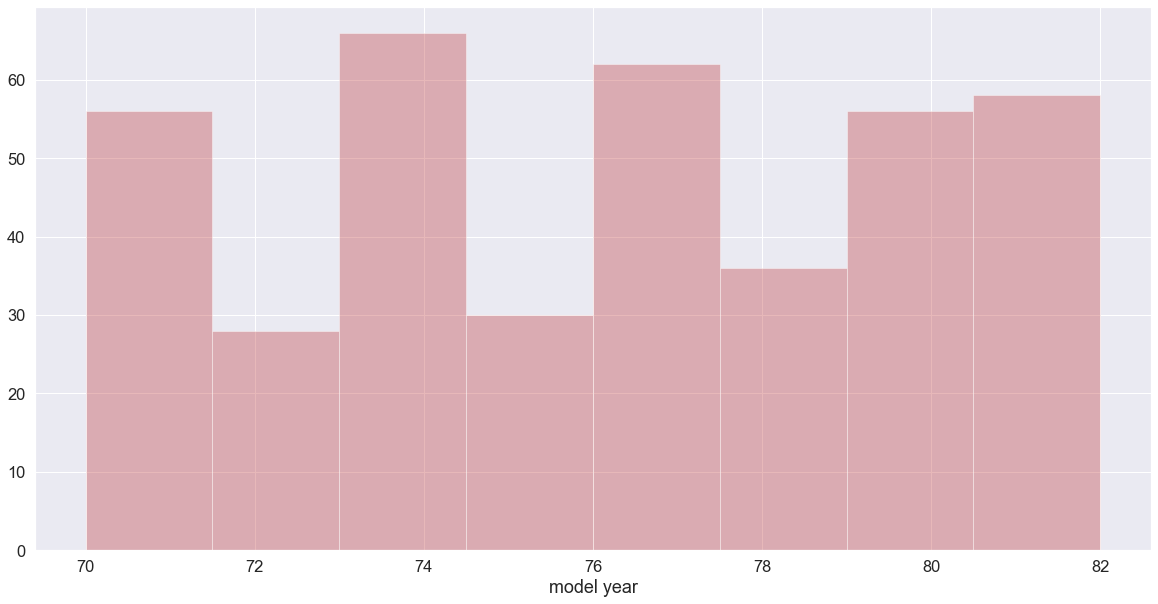

In [50]:
# identify The auto model year distribution 
sns.distplot(df["model year"] , kde=False , color="r")

<AxesSubplot:xlabel='model year', ylabel='Density'>

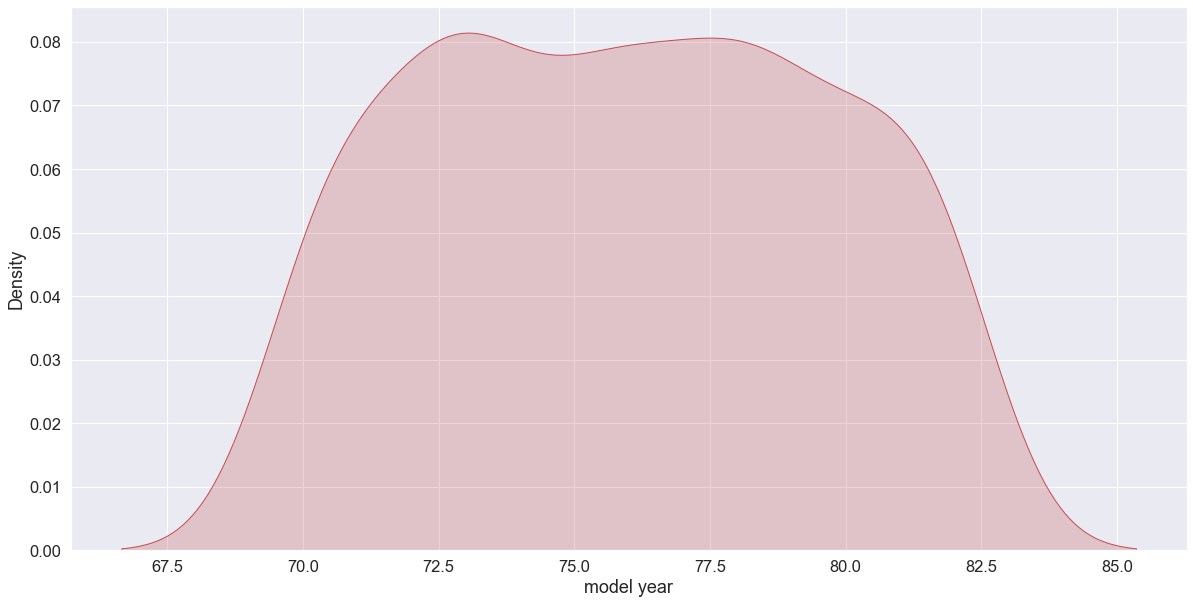

In [51]:
sns.kdeplot(df["model year"] , shade=True , color="r")

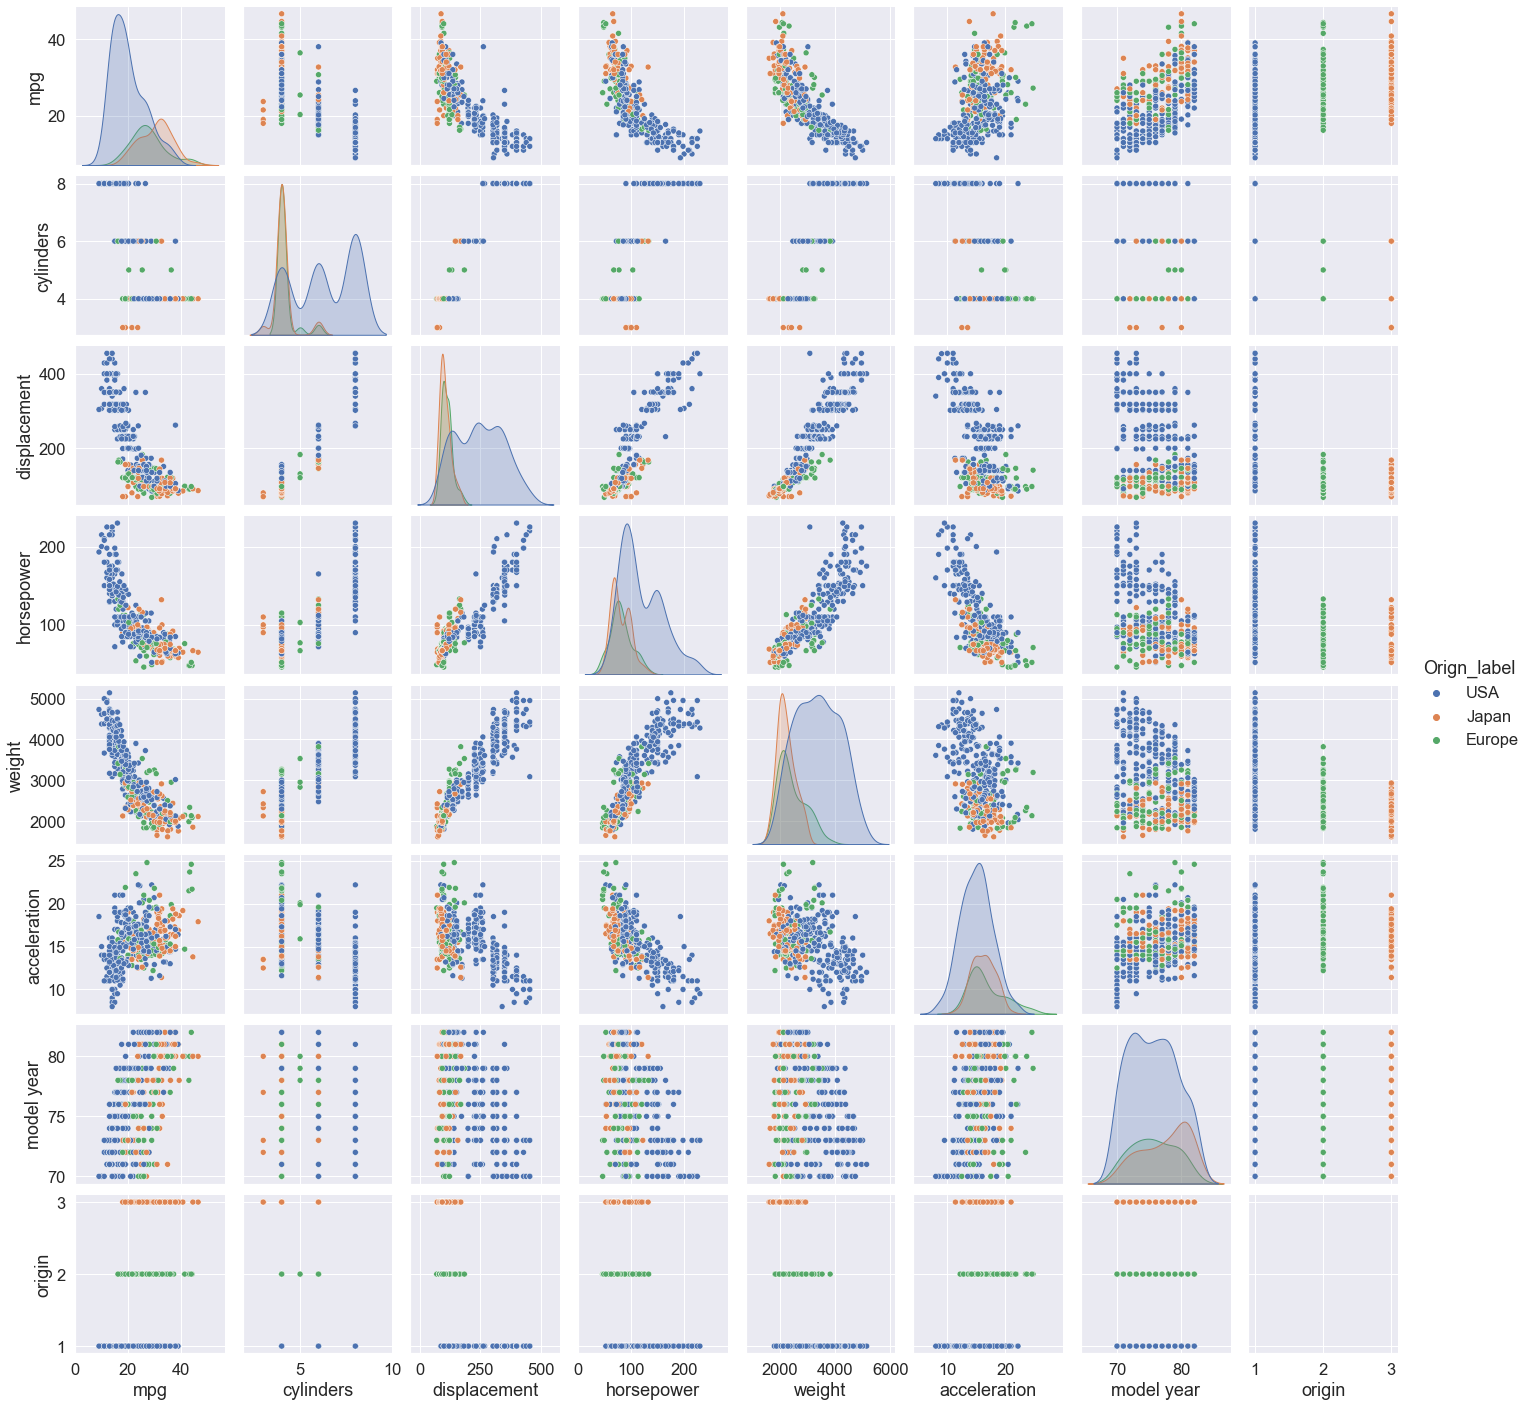

In [52]:
sns.pairplot(df , hue="Orign_label")

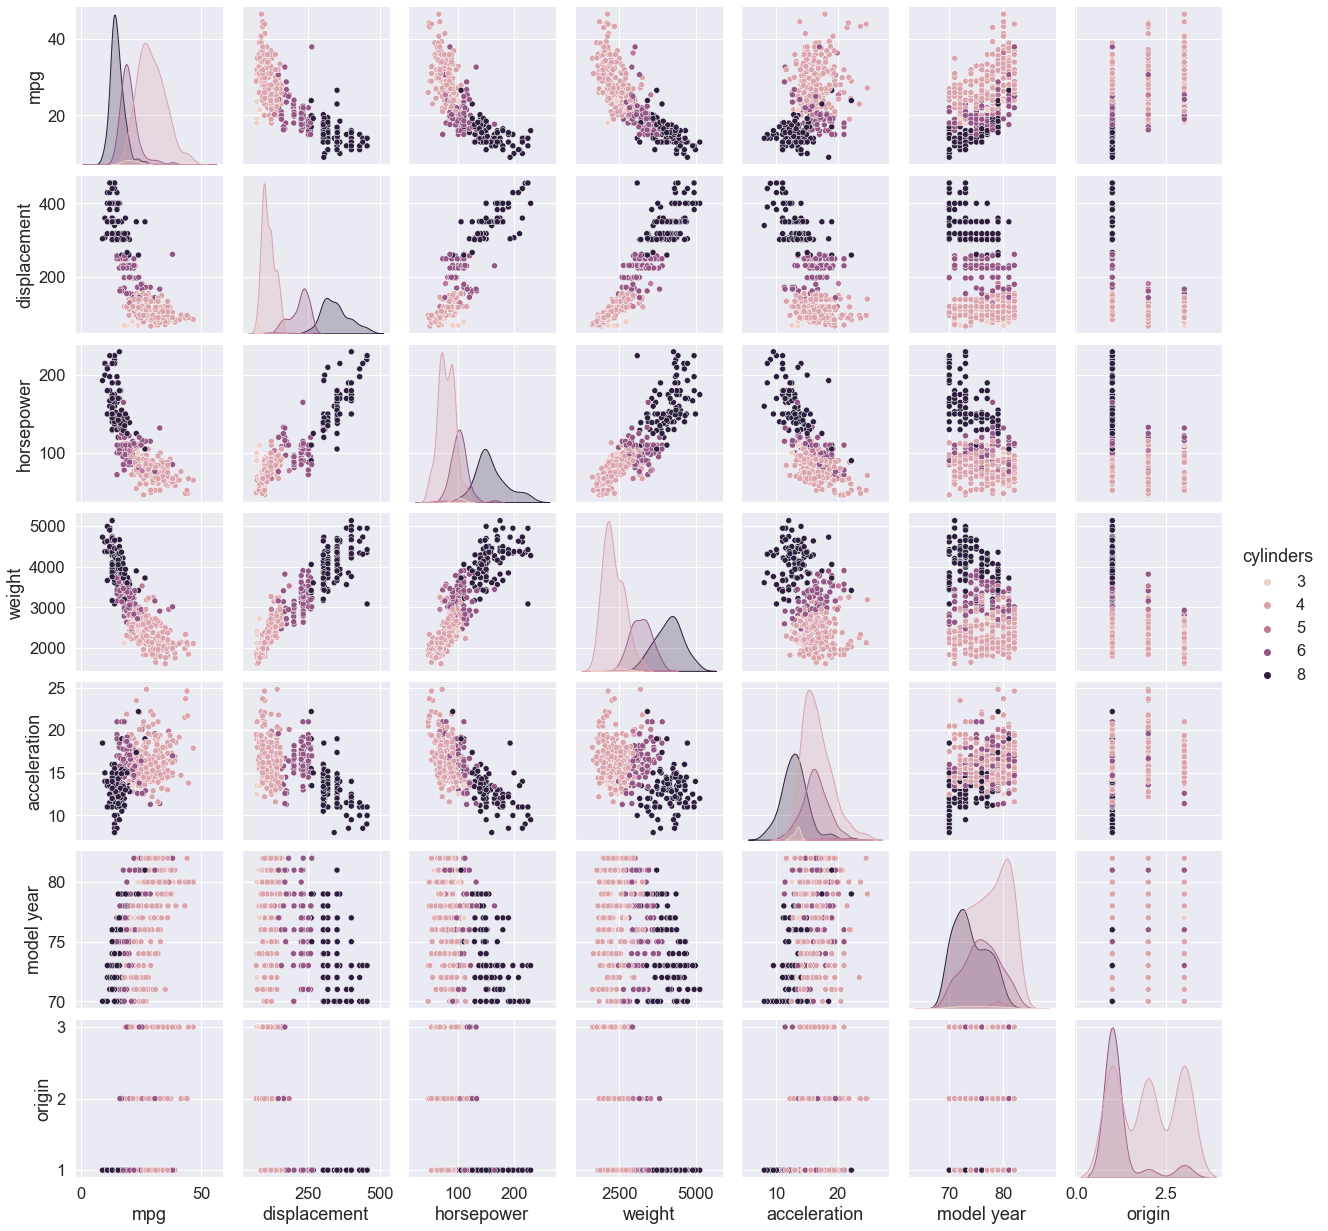

In [53]:
sns.pairplot(df , hue="cylinders")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   Orign_label   392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 33.7+ KB


<AxesSubplot:ylabel='mpg'>

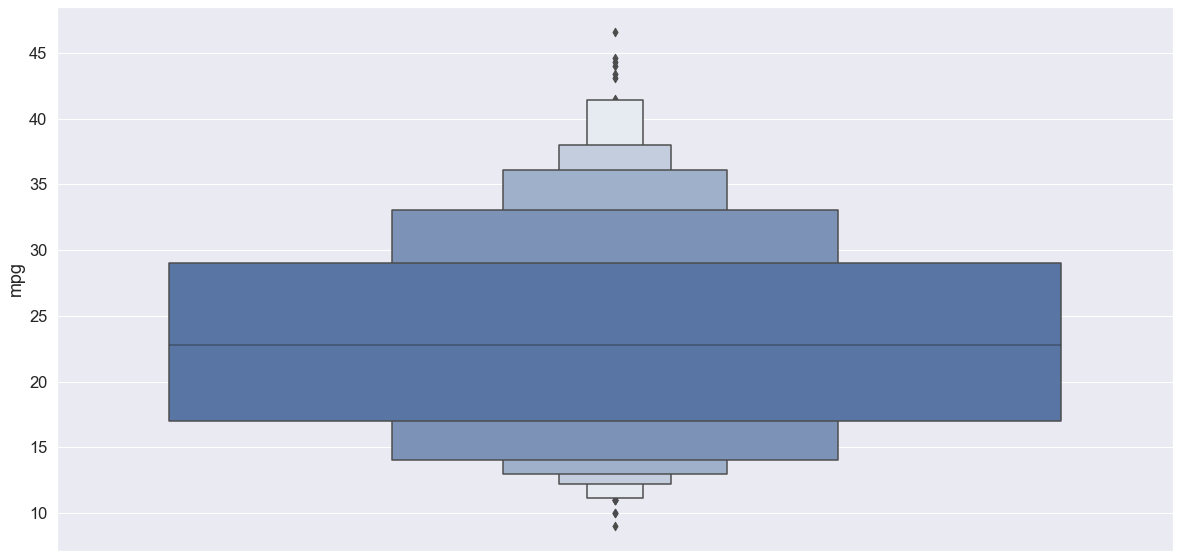

In [55]:
sns.boxenplot(y = "mpg" , data = df )

<AxesSubplot:ylabel='horsepower'>

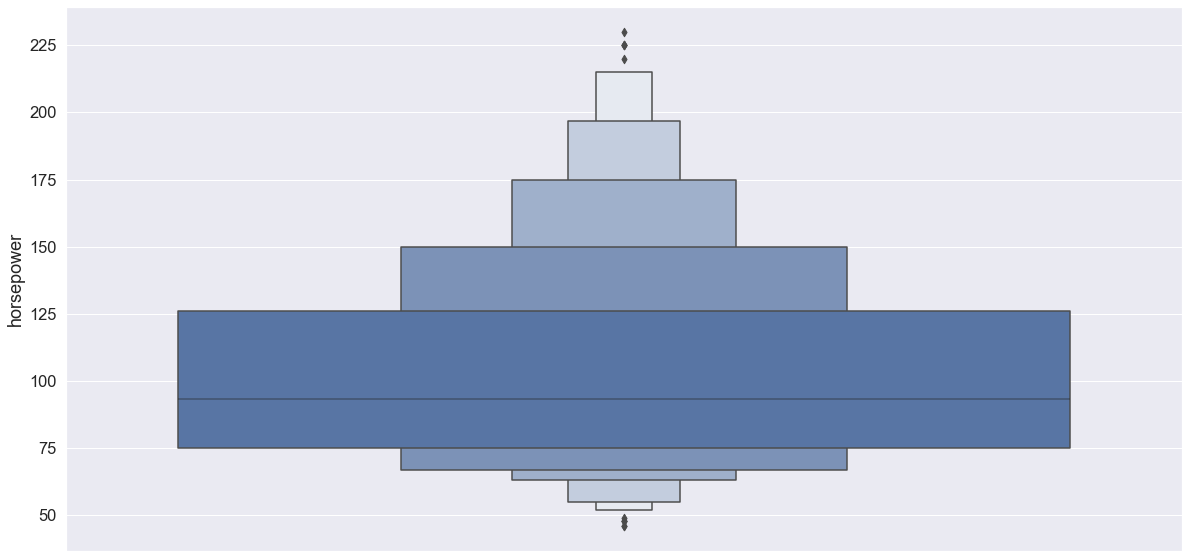

In [56]:
sns.boxenplot( y = "horsepower" , data = df)

<AxesSubplot:ylabel='acceleration'>

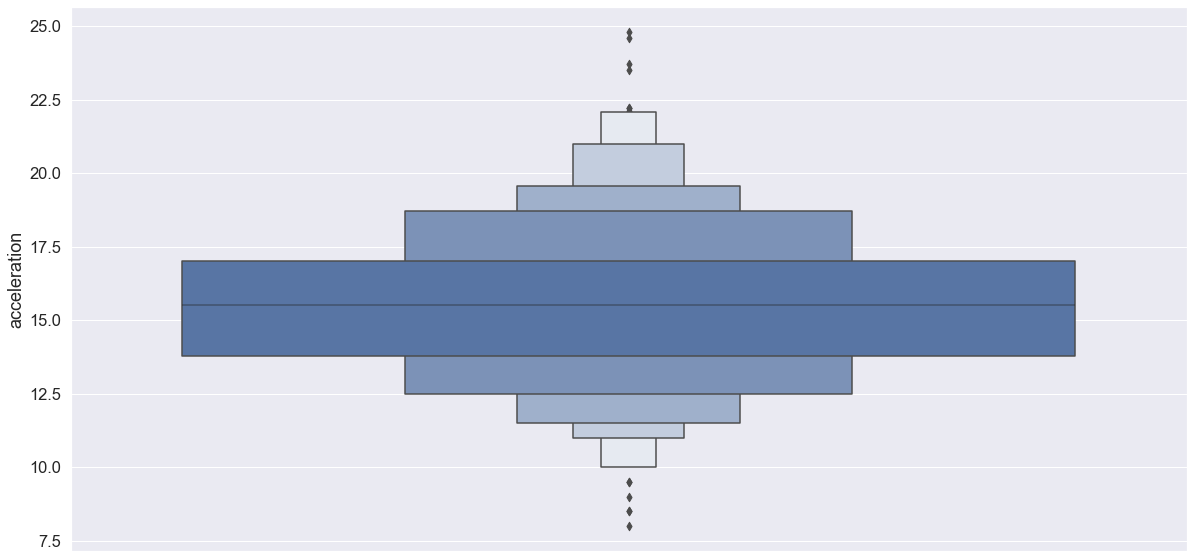

In [57]:
sns.boxenplot(y = "acceleration" , data = df )

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

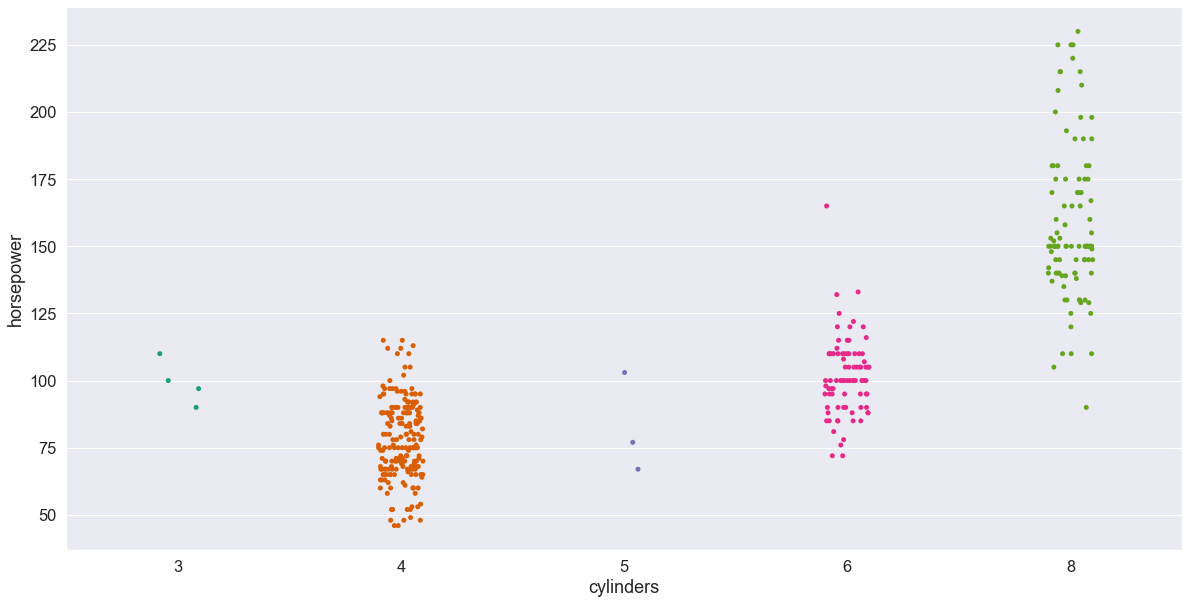

In [58]:
sns.stripplot( x = "cylinders" , y = "horsepower" , data = df , palette="Dark2")


<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

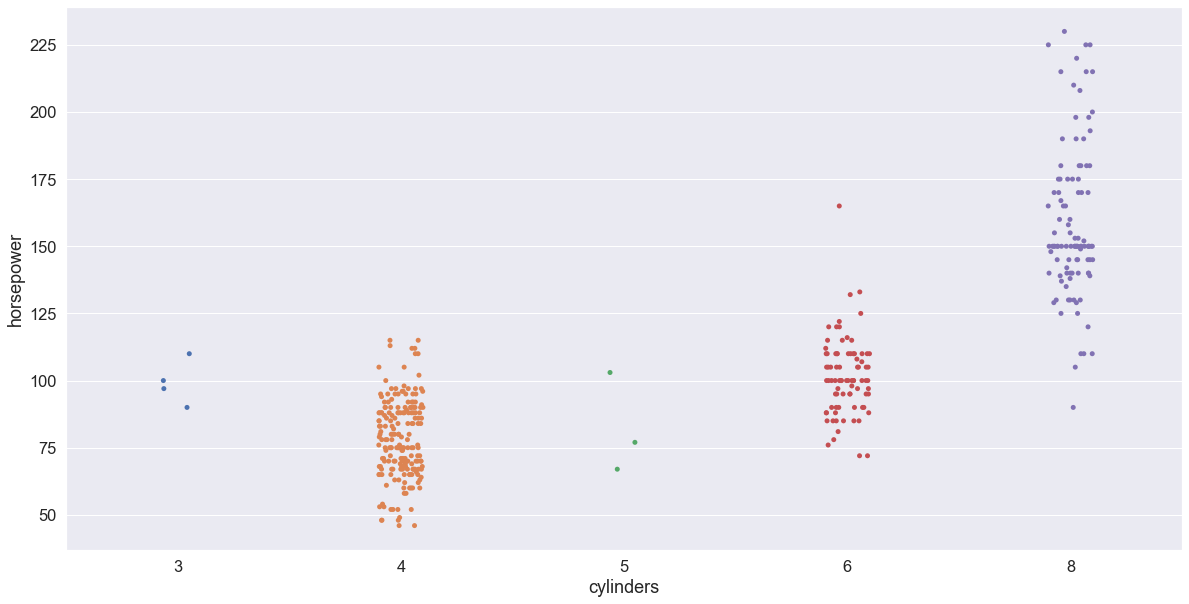

In [59]:
sns.stripplot(x = "cylinders" , y = "horsepower" , data = df )


<AxesSubplot:xlabel='model year', ylabel='horsepower'>

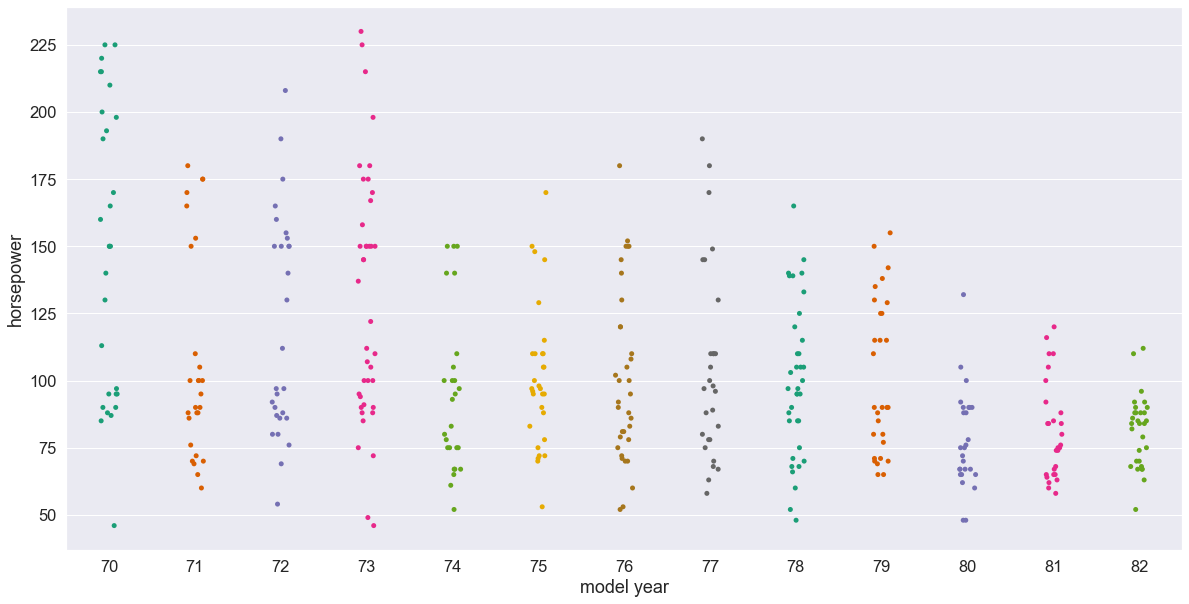

In [60]:
sns.stripplot(x = "model year" , y = "horsepower" , data = df  , palette="Dark2")


<AxesSubplot:xlabel='Orign_label', ylabel='horsepower'>

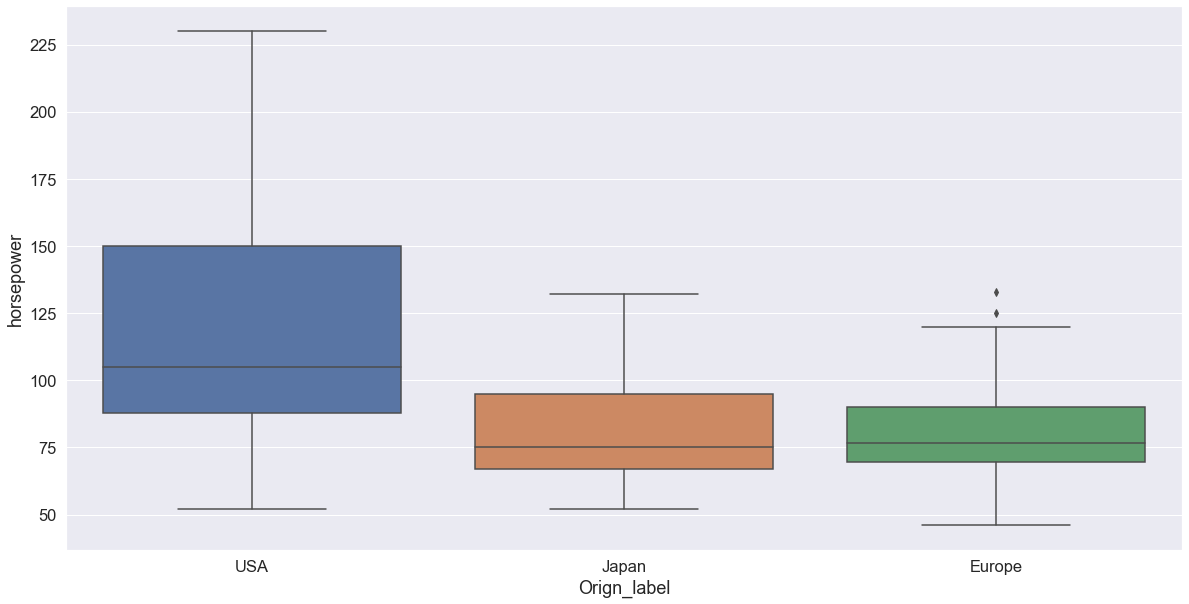

In [61]:
sns.boxplot( x = "Orign_label"  , y = "horsepower" , data = df)

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

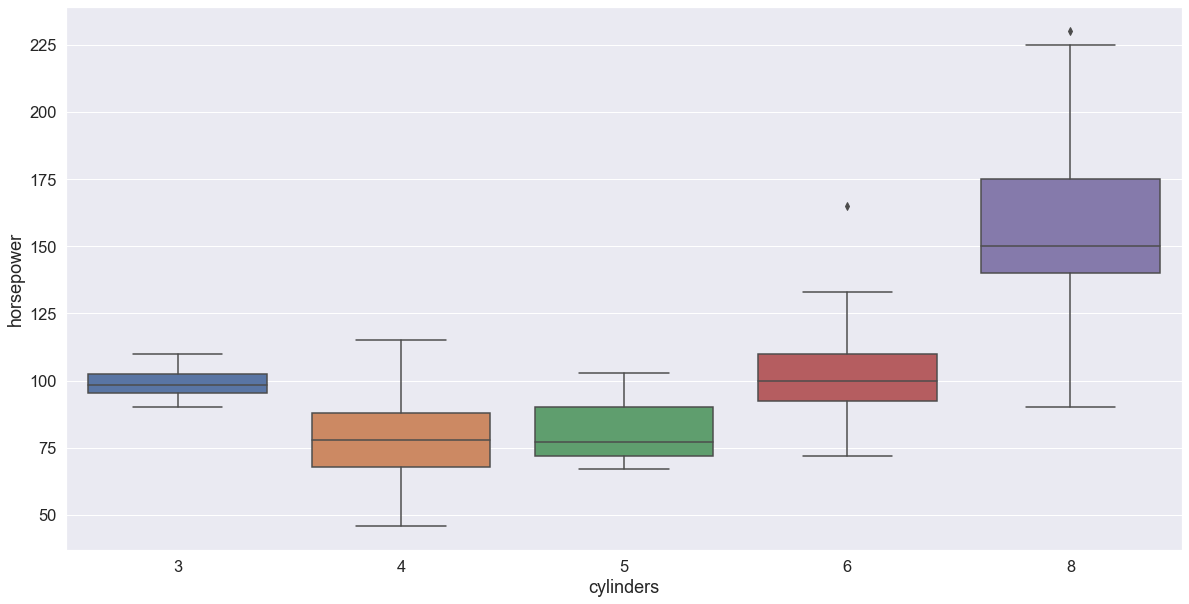

In [62]:
sns.boxplot( x = "cylinders"  , y = "horsepower" , data = df)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

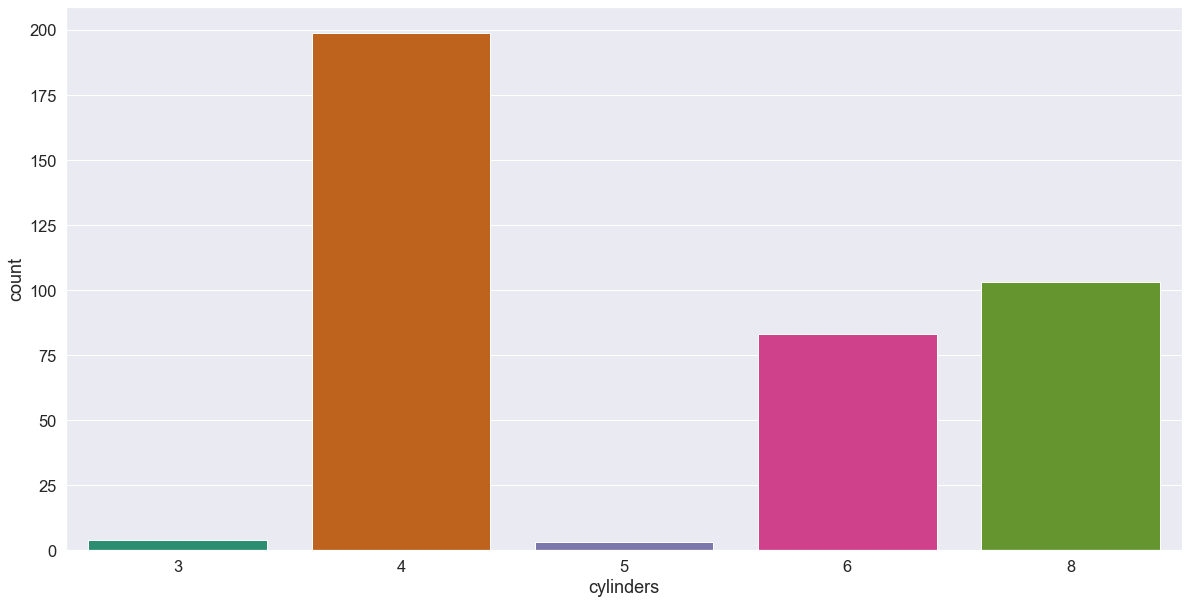

In [63]:
sns.countplot("cylinders" , data = df , palette="Dark2")

<AxesSubplot:xlabel='Orign_label', ylabel='count'>

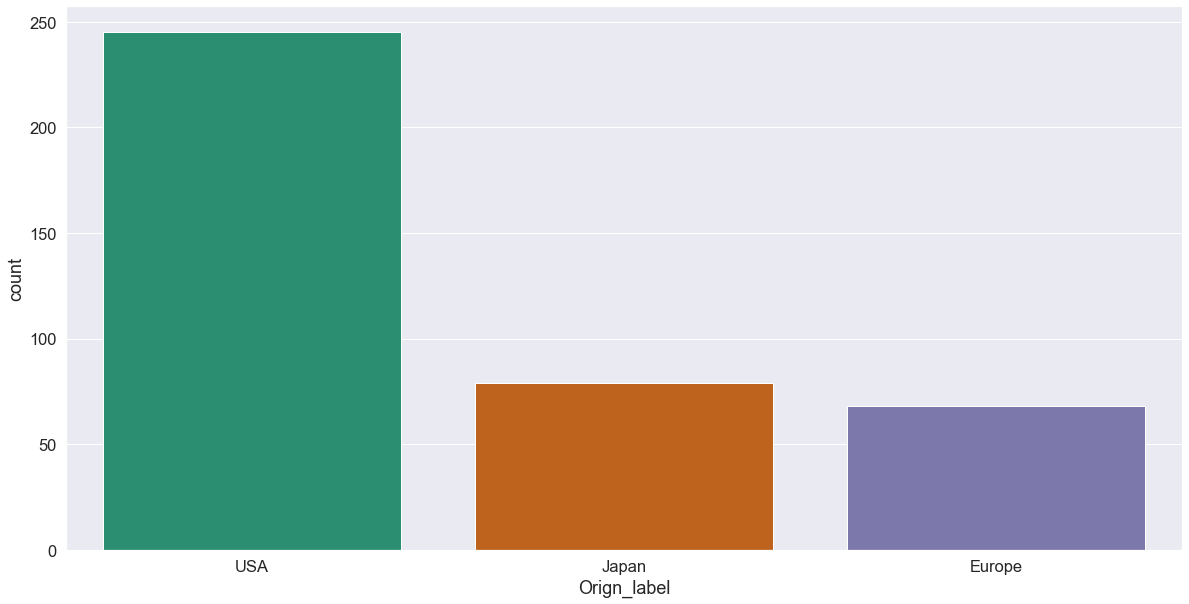

In [64]:
sns.countplot("Orign_label" , data = df , palette="Dark2")

<AxesSubplot:xlabel='model year', ylabel='count'>

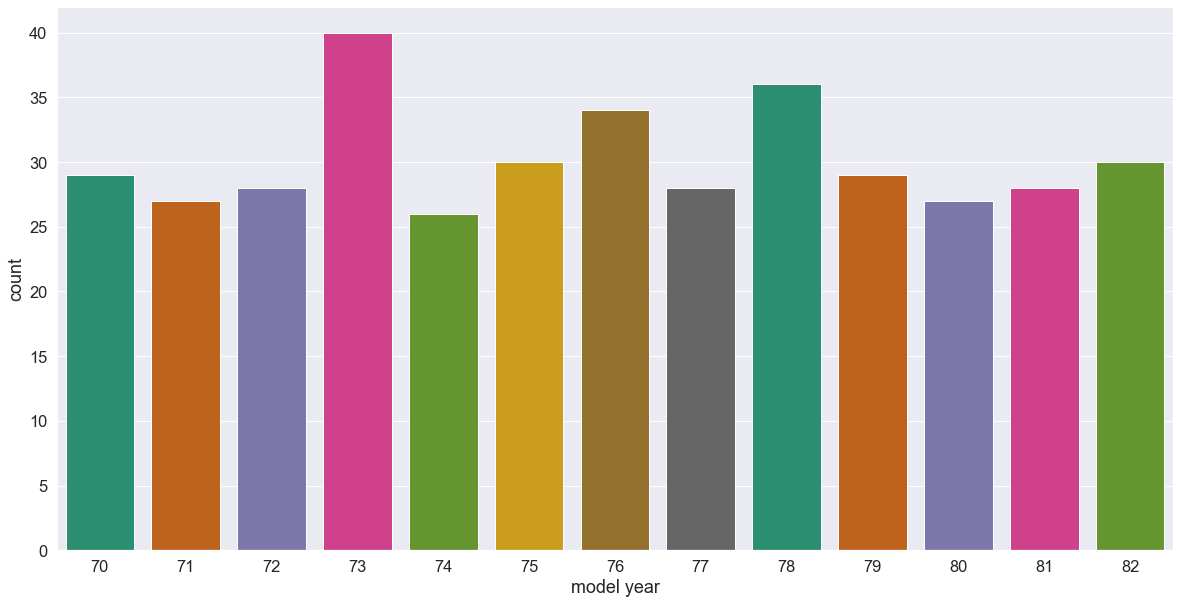

In [65]:
sns.countplot("model year" , data = df , palette="Dark2")

In [66]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'Orign_label'],
      dtype='object')

In [67]:
df.drop(['car name' , "Orign_label"] , axis=1 , inplace=True)


In [68]:
df = pd.get_dummies(df , drop_first=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 35.7 KB


In [70]:
x = df.drop("horsepower" , axis=1)
y = df["horsepower"]

In [71]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state=42 )

In [72]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=100, activation='relu', input_shape=[x_train.shape[1]]))
model.add(keras.layers.Dense(units=1))

In [74]:
model.compile(optimizer="adam" , loss="mean_squared_error")

In [75]:
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau , ModelCheckpoint

In [76]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-4)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=600)

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=2000, callbacks=[lrd, mcp, es])

Epoch 1/2000
8/8 [==============================] - 0s 20ms/step - loss: 12881.1963 - val_loss: 10596.6709
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 12801.2422 - val_loss: 10531.6787
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 12727.0938 - val_loss: 10466.4609
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 12649.7383 - val_loss: 10400.8838
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 12571.2822 - val_loss: 10333.8320
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 12490.4229 - val_loss: 10264.2480
Epoch 7/2000
8/8 [==============================] - 0s 3ms/step - loss: 12406.8184 - val_loss: 10190.4883
Epoch 8/2000
8/8 [==============================] - 0s 3ms/step - loss: 12317.7373 - val_loss: 10113.1230
Epoch 9/2000
8/8 [==============================] - 0s 4ms/step - loss: 12224.2188 - val_loss: 10030.9473
Epoch 10/2000
8/8 [==========================

Epoch 79/2000
8/8 [==============================] - 0s 7ms/step - loss: 1323.6664 - val_loss: 1237.9329
Epoch 80/2000
8/8 [==============================] - 0s 4ms/step - loss: 1305.2770 - val_loss: 1223.1423
Epoch 81/2000
8/8 [==============================] - 0s 6ms/step - loss: 1286.2706 - val_loss: 1209.2263
Epoch 82/2000
8/8 [==============================] - 0s 6ms/step - loss: 1268.9982 - val_loss: 1195.5278
Epoch 83/2000
8/8 [==============================] - 0s 6ms/step - loss: 1252.5383 - val_loss: 1182.1567
Epoch 84/2000
8/8 [==============================] - 0s 5ms/step - loss: 1237.0818 - val_loss: 1168.9404
Epoch 85/2000
8/8 [==============================] - 0s 5ms/step - loss: 1219.8615 - val_loss: 1156.9590
Epoch 86/2000
8/8 [==============================] - 0s 5ms/step - loss: 1205.5991 - val_loss: 1144.5394
Epoch 87/2000
8/8 [==============================] - 0s 3ms/step - loss: 1190.3527 - val_loss: 1132.3745
Epoch 88/2000
8/8 [==============================] - 0s

Epoch 236/2000
8/8 [==============================] - 0s 3ms/step - loss: 194.0812 - val_loss: 253.2047
Epoch 237/2000
8/8 [==============================] - 0s 3ms/step - loss: 192.9566 - val_loss: 251.7666
Epoch 238/2000
8/8 [==============================] - 0s 3ms/step - loss: 192.0298 - val_loss: 249.6078
Epoch 239/2000
8/8 [==============================] - 0s 10ms/step - loss: 190.9454 - val_loss: 248.6240
Epoch 240/2000
8/8 [==============================] - 0s 3ms/step - loss: 189.9912 - val_loss: 248.0092
Epoch 241/2000
8/8 [==============================] - 0s 3ms/step - loss: 188.8354 - val_loss: 246.7147
Epoch 242/2000
8/8 [==============================] - 0s 3ms/step - loss: 188.0776 - val_loss: 244.9121
Epoch 243/2000
8/8 [==============================] - 0s 3ms/step - loss: 186.9308 - val_loss: 244.1614
Epoch 244/2000
8/8 [==============================] - 0s 3ms/step - loss: 185.9017 - val_loss: 242.9707
Epoch 245/2000
8/8 [==============================] - 0s 8ms/st

Epoch 315/2000
8/8 [==============================] - 0s 9ms/step - loss: 136.6100 - val_loss: 181.6643
Epoch 316/2000
8/8 [==============================] - 0s 6ms/step - loss: 136.2407 - val_loss: 180.8335
Epoch 317/2000
8/8 [==============================] - 0s 5ms/step - loss: 135.6969 - val_loss: 179.6811
Epoch 318/2000
8/8 [==============================] - 0s 5ms/step - loss: 135.2268 - val_loss: 178.9124
Epoch 319/2000
8/8 [==============================] - 0s 3ms/step - loss: 134.9092 - val_loss: 178.7722
Epoch 320/2000
8/8 [==============================] - 0s 3ms/step - loss: 134.4664 - val_loss: 178.0390
Epoch 321/2000
8/8 [==============================] - 0s 3ms/step - loss: 133.9594 - val_loss: 177.4991
Epoch 322/2000
8/8 [==============================] - 0s 3ms/step - loss: 133.5340 - val_loss: 177.0281
Epoch 323/2000
8/8 [==============================] - 0s 3ms/step - loss: 133.2590 - val_loss: 175.9944
Epoch 324/2000
8/8 [==============================] - 0s 7ms/ste

Epoch 394/2000
8/8 [==============================] - 0s 4ms/step - loss: 112.8234 - val_loss: 143.3257
Epoch 395/2000
8/8 [==============================] - 0s 4ms/step - loss: 112.5999 - val_loss: 142.9467
Epoch 396/2000
8/8 [==============================] - 0s 4ms/step - loss: 112.3827 - val_loss: 142.2812
Epoch 397/2000
8/8 [==============================] - 0s 6ms/step - loss: 112.3829 - val_loss: 142.1915
Epoch 398/2000
8/8 [==============================] - 0s 3ms/step - loss: 112.0434 - val_loss: 141.4657
Epoch 399/2000
8/8 [==============================] - 0s 3ms/step - loss: 111.8557 - val_loss: 141.0309
Epoch 400/2000
8/8 [==============================] - 0s 7ms/step - loss: 111.8435 - val_loss: 141.3149
Epoch 401/2000
8/8 [==============================] - 0s 5ms/step - loss: 111.4195 - val_loss: 140.6900
Epoch 402/2000
8/8 [==============================] - 0s 3ms/step - loss: 111.3593 - val_loss: 140.2229
Epoch 403/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 473/2000
8/8 [==============================] - 0s 4ms/step - loss: 101.7281 - val_loss: 123.7194
Epoch 474/2000
8/8 [==============================] - 0s 4ms/step - loss: 101.7105 - val_loss: 124.0680
Epoch 475/2000
8/8 [==============================] - 0s 5ms/step - loss: 101.4688 - val_loss: 123.6092
Epoch 476/2000
8/8 [==============================] - 0s 4ms/step - loss: 101.7360 - val_loss: 123.5635
Epoch 477/2000
8/8 [==============================] - 0s 4ms/step - loss: 101.4307 - val_loss: 122.8097
Epoch 478/2000
8/8 [==============================] - 0s 9ms/step - loss: 101.1332 - val_loss: 122.4541
Epoch 479/2000
8/8 [==============================] - 0s 3ms/step - loss: 101.1760 - val_loss: 122.5016
Epoch 480/2000
8/8 [==============================] - 0s 3ms/step - loss: 101.1431 - val_loss: 122.5428
Epoch 481/2000
8/8 [==============================] - 0s 3ms/step - loss: 100.8747 - val_loss: 122.5190
Epoch 482/2000
8/8 [==============================] - 0s 3ms/ste

8/8 [==============================] - 0s 3ms/step - loss: 91.6574 - val_loss: 109.5516
Epoch 632/2000
8/8 [==============================] - 0s 3ms/step - loss: 91.5763 - val_loss: 109.6017
Epoch 633/2000
8/8 [==============================] - 0s 3ms/step - loss: 91.5207 - val_loss: 109.4552
Epoch 634/2000
8/8 [==============================] - 0s 4ms/step - loss: 91.6205 - val_loss: 109.7757
Epoch 635/2000
8/8 [==============================] - 0s 5ms/step - loss: 91.4233 - val_loss: 109.9664
Epoch 636/2000
8/8 [==============================] - 0s 5ms/step - loss: 91.3704 - val_loss: 110.0180
Epoch 637/2000
8/8 [==============================] - 0s 6ms/step - loss: 91.3269 - val_loss: 109.7295
Epoch 638/2000
8/8 [==============================] - 0s 3ms/step - loss: 91.2401 - val_loss: 109.7686
Epoch 639/2000
8/8 [==============================] - 0s 3ms/step - loss: 91.3003 - val_loss: 109.7862
Epoch 640/2000
8/8 [==============================] - 0s 5ms/step - loss: 91.2470 - val_

8/8 [==============================] - 0s 5ms/step - loss: 85.1871 - val_loss: 105.5711
Epoch 790/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.2728 - val_loss: 105.5407
Epoch 791/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.1152 - val_loss: 105.8746
Epoch 792/2000
8/8 [==============================] - 0s 7ms/step - loss: 85.2455 - val_loss: 106.0536
Epoch 793/2000
8/8 [==============================] - 0s 2ms/step - loss: 85.5522 - val_loss: 105.0411
Epoch 794/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.0629 - val_loss: 105.2314
Epoch 795/2000
8/8 [==============================] - 0s 7ms/step - loss: 85.0833 - val_loss: 106.0019
Epoch 796/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.0560 - val_loss: 105.9824
Epoch 797/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.0434 - val_loss: 105.1376
Epoch 798/2000
8/8 [==============================] - 0s 4ms/step - loss: 85.0057 - val_

8/8 [==============================] - 0s 3ms/step - loss: 79.9928 - val_loss: 104.5176
Epoch 948/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.9585 - val_loss: 103.7757
Epoch 949/2000
8/8 [==============================] - 0s 3ms/step - loss: 80.1011 - val_loss: 103.2130
Epoch 950/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.9990 - val_loss: 103.8119
Epoch 951/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.9990 - val_loss: 103.5170
Epoch 952/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.9957 - val_loss: 104.1526
Epoch 953/2000
8/8 [==============================] - 0s 3ms/step - loss: 80.0132 - val_loss: 104.1795
Epoch 954/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.7448 - val_loss: 103.6136
Epoch 955/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.9301 - val_loss: 103.5029
Epoch 956/2000
8/8 [==============================] - 0s 3ms/step - loss: 79.7867 - val_

Epoch 1105/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.8996 - val_loss: 103.8869
Epoch 1106/2000
8/8 [==============================] - 0s 4ms/step - loss: 75.8153 - val_loss: 103.4901
Epoch 1107/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.6493 - val_loss: 103.8800
Epoch 1108/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.8589 - val_loss: 103.5270
Epoch 1109/2000
8/8 [==============================] - 0s 8ms/step - loss: 75.6421 - val_loss: 103.8407
Epoch 1110/2000
8/8 [==============================] - 0s 7ms/step - loss: 75.6285 - val_loss: 103.9824
Epoch 1111/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.5820 - val_loss: 104.0859
Epoch 1112/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.5892 - val_loss: 103.8569
Epoch 1113/2000
8/8 [==============================] - 0s 3ms/step - loss: 75.5002 - val_loss: 103.2734
Epoch 1114/2000
8/8 [==============================] - 0s 3ms/st

Epoch 1184/2000
8/8 [==============================] - 0s 8ms/step - loss: 74.2451 - val_loss: 104.4562
Epoch 1185/2000
8/8 [==============================] - 0s 7ms/step - loss: 74.1867 - val_loss: 104.0542
Epoch 1186/2000
8/8 [==============================] - 0s 4ms/step - loss: 74.0232 - val_loss: 104.3077
Epoch 1187/2000
8/8 [==============================] - 0s 3ms/step - loss: 73.9935 - val_loss: 104.2053
Epoch 1188/2000
8/8 [==============================] - 0s 3ms/step - loss: 74.4143 - val_loss: 103.4936
Epoch 1189/2000
8/8 [==============================] - 0s 3ms/step - loss: 74.0165 - val_loss: 103.6860
Epoch 1190/2000
8/8 [==============================] - 0s 5ms/step - loss: 74.2967 - val_loss: 104.2330
Epoch 1191/2000
8/8 [==============================] - 0s 3ms/step - loss: 73.8550 - val_loss: 103.9900
Epoch 1192/2000
8/8 [==============================] - 0s 3ms/step - loss: 73.8381 - val_loss: 103.6883
Epoch 1193/2000
8/8 [==============================] - 0s 3ms/st

Epoch 1263/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.5236 - val_loss: 103.9313
Epoch 1264/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.6307 - val_loss: 104.0024
Epoch 1265/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.6270 - val_loss: 103.8379
Epoch 1266/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.5850 - val_loss: 104.0477
Epoch 1267/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.5105 - val_loss: 103.6217
Epoch 1268/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.5894 - val_loss: 104.0020
Epoch 1269/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.6329 - val_loss: 104.3124
Epoch 1270/2000
8/8 [==============================] - 0s 8ms/step - loss: 72.5233 - val_loss: 104.0723

Epoch 01270: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 1271/2000
8/8 [==============================] - 0s 3ms/step - loss: 72.4232 - va

Epoch 1341/2000
8/8 [==============================] - 0s 7ms/step - loss: 71.4824 - val_loss: 104.3459
Epoch 1342/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.5792 - val_loss: 104.3382
Epoch 1343/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.4952 - val_loss: 104.3043
Epoch 1344/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.4556 - val_loss: 104.5218
Epoch 1345/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.4919 - val_loss: 104.3024
Epoch 1346/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.4455 - val_loss: 104.7411
Epoch 1347/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.3988 - val_loss: 104.6280
Epoch 1348/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.6157 - val_loss: 104.6473
Epoch 1349/2000
8/8 [==============================] - 0s 3ms/step - loss: 71.3918 - val_loss: 104.8612
Epoch 1350/2000
8/8 [==============================] - 0s 3ms/st

Epoch 1420/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.5031 - val_loss: 105.0617
Epoch 1421/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.3868 - val_loss: 104.9334
Epoch 1422/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.5549 - val_loss: 104.9264
Epoch 1423/2000
8/8 [==============================] - 0s 5ms/step - loss: 70.3434 - val_loss: 105.0333
Epoch 1424/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.3505 - val_loss: 105.8808
Epoch 1425/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.4236 - val_loss: 105.4747
Epoch 1426/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.2848 - val_loss: 105.4755
Epoch 1427/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.4162 - val_loss: 105.1809
Epoch 1428/2000
8/8 [==============================] - 0s 3ms/step - loss: 70.2789 - val_loss: 105.4663
Epoch 1429/2000
8/8 [==============================] - 0s 4ms/st

Epoch 1498/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.6566 - val_loss: 105.9210
Epoch 1499/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.5231 - val_loss: 106.0058
Epoch 1500/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.4876 - val_loss: 105.8542
Epoch 1501/2000
8/8 [==============================] - 0s 5ms/step - loss: 69.5441 - val_loss: 106.2224
Epoch 1502/2000
8/8 [==============================] - 0s 5ms/step - loss: 69.6805 - val_loss: 106.1140
Epoch 1503/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.3912 - val_loss: 105.7612
Epoch 1504/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.4271 - val_loss: 105.6679
Epoch 1505/2000
8/8 [==============================] - 0s 5ms/step - loss: 69.7074 - val_loss: 105.4608
Epoch 1506/2000
8/8 [==============================] - 0s 4ms/step - loss: 69.4713 - val_loss: 105.8555
Epoch 1507/2000
8/8 [==============================] - 0s 5ms/st

Epoch 1577/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.7797 - val_loss: 106.7095
Epoch 1578/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.8821 - val_loss: 106.9551
Epoch 1579/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.8128 - val_loss: 106.9690
Epoch 1580/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.6868 - val_loss: 106.8039
Epoch 1581/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.7418 - val_loss: 107.0614
Epoch 1582/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.7207 - val_loss: 107.1464
Epoch 1583/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.8060 - val_loss: 106.9908
Epoch 1584/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.6528 - val_loss: 106.8436
Epoch 1585/2000
8/8 [==============================] - 0s 4ms/step - loss: 68.8944 - val_loss: 106.9608
Epoch 1586/2000
8/8 [==============================] - 0s 4ms/st

Epoch 1656/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.0305 - val_loss: 107.4344
Epoch 1657/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.0329 - val_loss: 107.4839
Epoch 1658/2000
8/8 [==============================] - 0s 3ms/step - loss: 67.9932 - val_loss: 107.5921
Epoch 1659/2000
8/8 [==============================] - 0s 3ms/step - loss: 68.0134 - val_loss: 107.5274
Epoch 1660/2000
8/8 [==============================] - 0s 3ms/step - loss: 67.9537 - val_loss: 107.6684
Epoch 1661/2000
8/8 [==============================] - 0s 7ms/step - loss: 67.9620 - val_loss: 107.6756
Epoch 1662/2000
8/8 [==============================] - 0s 4ms/step - loss: 67.9737 - val_loss: 107.9376
Epoch 1663/2000
8/8 [==============================] - 0s 3ms/step - loss: 67.9764 - val_loss: 107.7415
Epoch 1664/2000
8/8 [==============================] - 0s 3ms/step - loss: 67.9869 - val_loss: 107.4455
Epoch 1665/2000
8/8 [==============================] - 0s 3ms/st

In [79]:
y_pred = model.predict(x_test)
y_pred

array([[ 72.693596],
       [ 98.57429 ],
       [ 60.116676],
       [ 62.73094 ],
       [ 94.122925],
       [ 77.33309 ],
       [186.7962  ],
       [ 76.39663 ],
       [105.882835],
       [ 59.855198],
       [186.45743 ],
       [113.130875],
       [145.34473 ],
       [ 79.24323 ],
       [121.680466],
       [ 78.63963 ],
       [ 99.88812 ],
       [ 76.722565],
       [ 92.23279 ],
       [ 81.72314 ],
       [ 89.89948 ],
       [ 37.152634],
       [ 66.920586],
       [140.9608  ],
       [ 72.50962 ],
       [ 82.00609 ],
       [ 90.833755],
       [112.953285],
       [ 56.26732 ],
       [ 83.622444],
       [155.49155 ],
       [ 98.77467 ],
       [124.63265 ],
       [ 77.98203 ],
       [181.52908 ],
       [ 67.16689 ],
       [150.98515 ],
       [ 75.538506],
       [155.48944 ],
       [185.38782 ],
       [155.90948 ],
       [ 77.854355],
       [ 66.41051 ],
       [ 85.19997 ],
       [162.53429 ],
       [200.1147  ],
       [102.73246 ],
       [ 70.8

In [80]:
y_pred[10]


array([186.45743], dtype=float32)

In [81]:
y_test.iloc[10]


190.0

In [82]:
r2_score(y_test, y_pred)


0.9274181970217498

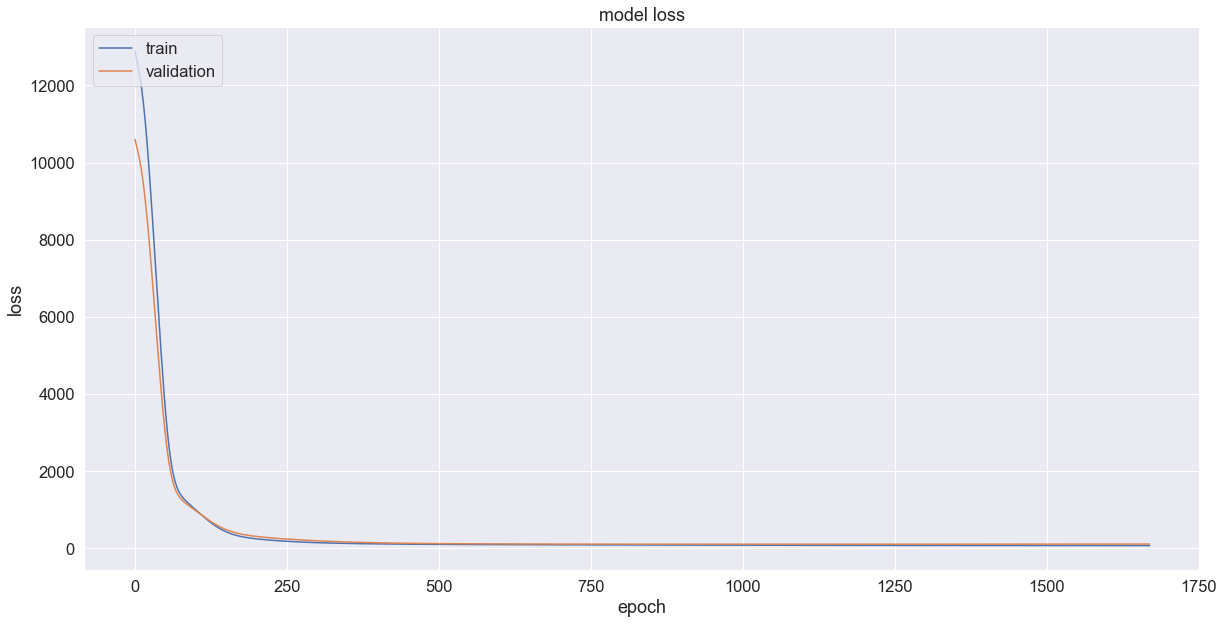

In [83]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=100, activation='relu', input_shape=[x_train.shape[1]]))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=1))

In [87]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.0002))


In [88]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=1000)

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=2000, callbacks=[lrd, mcp, es])

Epoch 1/2000
8/8 [==============================] - 1s 19ms/step - loss: 12928.3496 - val_loss: 10647.5693
Epoch 2/2000
8/8 [==============================] - 0s 4ms/step - loss: 12887.4688 - val_loss: 10613.3076
Epoch 3/2000
8/8 [==============================] - 0s 4ms/step - loss: 12849.7773 - val_loss: 10579.5801
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 12808.3457 - val_loss: 10546.6621
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 12769.4619 - val_loss: 10513.3262
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 12727.1348 - val_loss: 10478.7822
Epoch 7/2000
8/8 [==============================] - 0s 3ms/step - loss: 12682.4609 - val_loss: 10443.1777
Epoch 8/2000
8/8 [==============================] - 0s 4ms/step - loss: 12640.8193 - val_loss: 10405.2012
Epoch 9/2000
8/8 [==============================] - 0s 3ms/step - loss: 12593.8809 - val_loss: 10364.2959
Epoch 10/2000
8/8 [==========================

8/8 [==============================] - 0s 7ms/step - loss: 592.8734 - val_loss: 584.9797
Epoch 157/2000
8/8 [==============================] - 0s 5ms/step - loss: 600.7683 - val_loss: 579.8663
Epoch 158/2000
8/8 [==============================] - 0s 3ms/step - loss: 593.2161 - val_loss: 574.9938
Epoch 159/2000
8/8 [==============================] - 0s 4ms/step - loss: 580.6165 - val_loss: 570.3816
Epoch 160/2000
8/8 [==============================] - 0s 4ms/step - loss: 560.1114 - val_loss: 565.5237
Epoch 161/2000
8/8 [==============================] - 0s 3ms/step - loss: 577.3319 - val_loss: 560.5657
Epoch 162/2000
8/8 [==============================] - 0s 3ms/step - loss: 599.8605 - val_loss: 555.8303
Epoch 163/2000
8/8 [==============================] - 0s 3ms/step - loss: 582.0056 - val_loss: 550.8058
Epoch 164/2000
8/8 [==============================] - 0s 5ms/step - loss: 555.0344 - val_loss: 546.1249
Epoch 165/2000
8/8 [==============================] - 0s 8ms/step - loss: 534.0

Epoch 235/2000
8/8 [==============================] - 0s 3ms/step - loss: 342.9125 - val_loss: 317.5886
Epoch 236/2000
8/8 [==============================] - 0s 3ms/step - loss: 325.5340 - val_loss: 315.6440
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 311.5116 - val_loss: 313.2669
Epoch 238/2000
8/8 [==============================] - 0s 4ms/step - loss: 316.8651 - val_loss: 311.0629
Epoch 239/2000
8/8 [==============================] - 0s 3ms/step - loss: 331.0808 - val_loss: 308.6409
Epoch 240/2000
8/8 [==============================] - 0s 3ms/step - loss: 286.3600 - val_loss: 306.7356
Epoch 241/2000
8/8 [==============================] - 0s 3ms/step - loss: 338.2338 - val_loss: 304.8216
Epoch 242/2000
8/8 [==============================] - 0s 3ms/step - loss: 315.0677 - val_loss: 303.2116
Epoch 243/2000
8/8 [==============================] - 0s 3ms/step - loss: 290.4859 - val_loss: 300.9543
Epoch 244/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 314/2000
8/8 [==============================] - 0s 3ms/step - loss: 256.5967 - val_loss: 216.2630
Epoch 315/2000
8/8 [==============================] - 0s 6ms/step - loss: 242.0679 - val_loss: 215.4267
Epoch 316/2000
8/8 [==============================] - 0s 3ms/step - loss: 243.1880 - val_loss: 215.0530
Epoch 317/2000
8/8 [==============================] - 0s 3ms/step - loss: 232.0330 - val_loss: 214.6801
Epoch 318/2000
8/8 [==============================] - 0s 5ms/step - loss: 212.1284 - val_loss: 213.9049
Epoch 319/2000
8/8 [==============================] - 0s 3ms/step - loss: 220.3413 - val_loss: 213.4663
Epoch 320/2000
8/8 [==============================] - 0s 3ms/step - loss: 216.5951 - val_loss: 212.9082
Epoch 321/2000
8/8 [==============================] - 0s 5ms/step - loss: 257.1760 - val_loss: 212.1871
Epoch 322/2000
8/8 [==============================] - 0s 3ms/step - loss: 234.2135 - val_loss: 211.6287
Epoch 323/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 393/2000
8/8 [==============================] - 0s 3ms/step - loss: 203.2316 - val_loss: 185.0675
Epoch 394/2000
8/8 [==============================] - 0s 4ms/step - loss: 226.0636 - val_loss: 184.8658
Epoch 395/2000
8/8 [==============================] - 0s 3ms/step - loss: 217.4600 - val_loss: 184.6666
Epoch 396/2000
8/8 [==============================] - 0s 3ms/step - loss: 208.4977 - val_loss: 183.9970
Epoch 397/2000
8/8 [==============================] - 0s 3ms/step - loss: 201.0350 - val_loss: 183.7843
Epoch 398/2000
8/8 [==============================] - 0s 3ms/step - loss: 218.9718 - val_loss: 183.3662
Epoch 399/2000
8/8 [==============================] - 0s 8ms/step - loss: 192.4523 - val_loss: 182.9636
Epoch 400/2000
8/8 [==============================] - 0s 3ms/step - loss: 223.4807 - val_loss: 182.4578
Epoch 401/2000
8/8 [==============================] - 0s 3ms/step - loss: 208.7804 - val_loss: 182.4055
Epoch 402/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 472/2000
8/8 [==============================] - 0s 3ms/step - loss: 171.6919 - val_loss: 167.0588
Epoch 473/2000
8/8 [==============================] - 0s 5ms/step - loss: 183.5250 - val_loss: 167.1252
Epoch 474/2000
8/8 [==============================] - 0s 3ms/step - loss: 211.4285 - val_loss: 166.9496
Epoch 475/2000
8/8 [==============================] - 0s 3ms/step - loss: 185.5108 - val_loss: 166.8579
Epoch 476/2000
8/8 [==============================] - 0s 6ms/step - loss: 195.0014 - val_loss: 166.7659
Epoch 477/2000
8/8 [==============================] - 0s 3ms/step - loss: 180.1121 - val_loss: 166.4102
Epoch 478/2000
8/8 [==============================] - 0s 3ms/step - loss: 194.4515 - val_loss: 165.9603
Epoch 479/2000
8/8 [==============================] - 0s 3ms/step - loss: 181.7723 - val_loss: 166.2050
Epoch 480/2000
8/8 [==============================] - 0s 3ms/step - loss: 208.8878 - val_loss: 167.2418
Epoch 481/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 551/2000
8/8 [==============================] - 0s 3ms/step - loss: 176.3255 - val_loss: 155.8855
Epoch 552/2000
8/8 [==============================] - 0s 3ms/step - loss: 181.1029 - val_loss: 155.6259
Epoch 553/2000
8/8 [==============================] - 0s 3ms/step - loss: 192.0573 - val_loss: 156.0110
Epoch 554/2000
8/8 [==============================] - 0s 3ms/step - loss: 156.9781 - val_loss: 155.8246
Epoch 555/2000
8/8 [==============================] - 0s 4ms/step - loss: 182.4411 - val_loss: 155.6253
Epoch 556/2000
8/8 [==============================] - 0s 3ms/step - loss: 203.2645 - val_loss: 155.5122
Epoch 557/2000
8/8 [==============================] - 0s 5ms/step - loss: 155.9684 - val_loss: 155.6449
Epoch 558/2000
8/8 [==============================] - 0s 6ms/step - loss: 155.7930 - val_loss: 155.7421
Epoch 559/2000
8/8 [==============================] - 0s 4ms/step - loss: 198.9195 - val_loss: 155.6890
Epoch 560/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 630/2000
8/8 [==============================] - 0s 4ms/step - loss: 154.2993 - val_loss: 145.6660
Epoch 631/2000
8/8 [==============================] - 0s 3ms/step - loss: 180.9593 - val_loss: 145.3275
Epoch 632/2000
8/8 [==============================] - 0s 6ms/step - loss: 180.7527 - val_loss: 145.2717
Epoch 633/2000
8/8 [==============================] - 0s 3ms/step - loss: 178.1836 - val_loss: 145.4453
Epoch 634/2000
8/8 [==============================] - 0s 4ms/step - loss: 175.9990 - val_loss: 145.8705
Epoch 635/2000
8/8 [==============================] - 0s 5ms/step - loss: 176.7431 - val_loss: 146.3683
Epoch 636/2000
8/8 [==============================] - 0s 6ms/step - loss: 158.7182 - val_loss: 146.5390
Epoch 637/2000
8/8 [==============================] - 0s 3ms/step - loss: 167.5866 - val_loss: 146.7782
Epoch 638/2000
8/8 [==============================] - 0s 3ms/step - loss: 173.0852 - val_loss: 146.4660
Epoch 639/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 709/2000
8/8 [==============================] - 0s 3ms/step - loss: 164.1096 - val_loss: 142.6914
Epoch 710/2000
8/8 [==============================] - 0s 3ms/step - loss: 164.5469 - val_loss: 142.3619
Epoch 711/2000
8/8 [==============================] - 0s 3ms/step - loss: 179.3742 - val_loss: 140.9984
Epoch 712/2000
8/8 [==============================] - 0s 5ms/step - loss: 161.9201 - val_loss: 140.4050
Epoch 713/2000
8/8 [==============================] - 0s 4ms/step - loss: 158.0772 - val_loss: 140.1215
Epoch 714/2000
8/8 [==============================] - 0s 3ms/step - loss: 164.6068 - val_loss: 140.2368
Epoch 715/2000
8/8 [==============================] - 0s 3ms/step - loss: 169.1130 - val_loss: 140.6113
Epoch 716/2000
8/8 [==============================] - 0s 5ms/step - loss: 176.1634 - val_loss: 140.2957
Epoch 717/2000
8/8 [==============================] - 0s 5ms/step - loss: 173.7078 - val_loss: 140.3998
Epoch 718/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 788/2000
8/8 [==============================] - 0s 3ms/step - loss: 148.2164 - val_loss: 137.1322
Epoch 789/2000
8/8 [==============================] - 0s 4ms/step - loss: 155.9635 - val_loss: 137.4697
Epoch 790/2000
8/8 [==============================] - 0s 3ms/step - loss: 157.7473 - val_loss: 137.0809
Epoch 791/2000
8/8 [==============================] - 0s 3ms/step - loss: 149.0125 - val_loss: 137.2868
Epoch 792/2000
8/8 [==============================] - 0s 3ms/step - loss: 146.9991 - val_loss: 137.3562
Epoch 793/2000
8/8 [==============================] - 0s 5ms/step - loss: 183.3653 - val_loss: 138.0585
Epoch 794/2000
8/8 [==============================] - 0s 4ms/step - loss: 161.8584 - val_loss: 137.5947
Epoch 795/2000
8/8 [==============================] - 0s 3ms/step - loss: 141.9265 - val_loss: 136.6123
Epoch 796/2000
8/8 [==============================] - 0s 3ms/step - loss: 154.5427 - val_loss: 136.1630
Epoch 797/2000
8/8 [==============================] - 0s 3ms/ste

Epoch 867/2000
8/8 [==============================] - 0s 6ms/step - loss: 155.5448 - val_loss: 133.9722
Epoch 868/2000
8/8 [==============================] - 0s 4ms/step - loss: 148.9388 - val_loss: 133.7823
Epoch 869/2000
8/8 [==============================] - 0s 7ms/step - loss: 179.9026 - val_loss: 133.2974
Epoch 870/2000
8/8 [==============================] - 0s 4ms/step - loss: 158.0981 - val_loss: 132.9682
Epoch 871/2000
8/8 [==============================] - 0s 5ms/step - loss: 161.4668 - val_loss: 133.3021
Epoch 872/2000
8/8 [==============================] - 0s 3ms/step - loss: 164.5278 - val_loss: 133.7724
Epoch 873/2000
8/8 [==============================] - 0s 4ms/step - loss: 134.1842 - val_loss: 133.7090
Epoch 874/2000
8/8 [==============================] - 0s 7ms/step - loss: 134.0575 - val_loss: 133.6102
Epoch 875/2000
8/8 [==============================] - 0s 9ms/step - loss: 153.2926 - val_loss: 133.2670
Epoch 876/2000
8/8 [==============================] - 0s 4ms/ste

Epoch 946/2000
8/8 [==============================] - 0s 3ms/step - loss: 150.0500 - val_loss: 129.0733
Epoch 947/2000
8/8 [==============================] - 0s 5ms/step - loss: 158.5793 - val_loss: 128.4536
Epoch 948/2000
8/8 [==============================] - 0s 6ms/step - loss: 152.5184 - val_loss: 128.6708
Epoch 949/2000
8/8 [==============================] - 0s 6ms/step - loss: 154.9528 - val_loss: 129.1699
Epoch 950/2000
8/8 [==============================] - 0s 3ms/step - loss: 127.2631 - val_loss: 129.0877
Epoch 951/2000
8/8 [==============================] - 0s 6ms/step - loss: 158.5638 - val_loss: 129.0905
Epoch 952/2000
8/8 [==============================] - 0s 9ms/step - loss: 154.3644 - val_loss: 129.4771
Epoch 953/2000
8/8 [==============================] - 0s 9ms/step - loss: 152.4591 - val_loss: 129.2258
Epoch 954/2000
8/8 [==============================] - 0s 4ms/step - loss: 153.2956 - val_loss: 128.7113
Epoch 955/2000
8/8 [==============================] - 0s 4ms/ste

8/8 [==============================] - 0s 2ms/step - loss: 164.2595 - val_loss: 124.7084
Epoch 1103/2000
8/8 [==============================] - 0s 7ms/step - loss: 138.8037 - val_loss: 124.5208
Epoch 1104/2000
8/8 [==============================] - 0s 5ms/step - loss: 166.8947 - val_loss: 124.0465
Epoch 1105/2000
8/8 [==============================] - 0s 3ms/step - loss: 154.3629 - val_loss: 123.9844
Epoch 1106/2000
8/8 [==============================] - 0s 3ms/step - loss: 132.9922 - val_loss: 124.3411
Epoch 1107/2000
8/8 [==============================] - 0s 6ms/step - loss: 134.9753 - val_loss: 124.6896
Epoch 1108/2000
8/8 [==============================] - 0s 3ms/step - loss: 175.5074 - val_loss: 125.2194
Epoch 1109/2000
8/8 [==============================] - 0s 3ms/step - loss: 156.2483 - val_loss: 125.4230
Epoch 1110/2000
8/8 [==============================] - 0s 4ms/step - loss: 149.6175 - val_loss: 125.7238
Epoch 1111/2000
8/8 [==============================] - 0s 6ms/step - lo

8/8 [==============================] - 0s 4ms/step - loss: 136.0317 - val_loss: 123.7244
Epoch 1181/2000
8/8 [==============================] - 0s 3ms/step - loss: 146.0159 - val_loss: 123.9666
Epoch 1182/2000
8/8 [==============================] - 0s 5ms/step - loss: 135.3763 - val_loss: 124.5984
Epoch 1183/2000
8/8 [==============================] - 0s 5ms/step - loss: 158.0614 - val_loss: 124.3548
Epoch 1184/2000
8/8 [==============================] - 0s 3ms/step - loss: 126.0182 - val_loss: 124.1093
Epoch 1185/2000
8/8 [==============================] - 0s 5ms/step - loss: 142.8481 - val_loss: 124.1943
Epoch 1186/2000
8/8 [==============================] - 0s 5ms/step - loss: 126.8626 - val_loss: 124.2695
Epoch 1187/2000
8/8 [==============================] - 0s 4ms/step - loss: 152.8789 - val_loss: 123.9187
Epoch 1188/2000
8/8 [==============================] - 0s 4ms/step - loss: 133.0956 - val_loss: 124.2925
Epoch 1189/2000
8/8 [==============================] - 0s 4ms/step - lo

8/8 [==============================] - 0s 5ms/step - loss: 137.0329 - val_loss: 121.2599
Epoch 1337/2000
8/8 [==============================] - 0s 2ms/step - loss: 131.5940 - val_loss: 121.3906
Epoch 1338/2000
8/8 [==============================] - 0s 3ms/step - loss: 131.5487 - val_loss: 121.3222
Epoch 1339/2000
8/8 [==============================] - 0s 3ms/step - loss: 136.3345 - val_loss: 120.8979
Epoch 1340/2000
8/8 [==============================] - 0s 3ms/step - loss: 135.9240 - val_loss: 120.5962
Epoch 1341/2000
8/8 [==============================] - 0s 5ms/step - loss: 138.2346 - val_loss: 119.8745
Epoch 1342/2000
8/8 [==============================] - 0s 2ms/step - loss: 151.6349 - val_loss: 119.3287
Epoch 1343/2000
8/8 [==============================] - 0s 10ms/step - loss: 145.2419 - val_loss: 119.0646
Epoch 1344/2000
8/8 [==============================] - 0s 5ms/step - loss: 120.0159 - val_loss: 119.6130
Epoch 1345/2000
8/8 [==============================] - 0s 8ms/step - l

8/8 [==============================] - 0s 3ms/step - loss: 134.9264 - val_loss: 118.1122
Epoch 1493/2000
8/8 [==============================] - 0s 3ms/step - loss: 122.8541 - val_loss: 117.9524
Epoch 1494/2000
8/8 [==============================] - 0s 3ms/step - loss: 125.9971 - val_loss: 117.7547
Epoch 1495/2000
8/8 [==============================] - 0s 4ms/step - loss: 115.1317 - val_loss: 117.7629
Epoch 1496/2000
8/8 [==============================] - 0s 3ms/step - loss: 123.0572 - val_loss: 117.3198
Epoch 1497/2000
8/8 [==============================] - 0s 4ms/step - loss: 136.4427 - val_loss: 116.8411
Epoch 1498/2000
8/8 [==============================] - 0s 3ms/step - loss: 126.0544 - val_loss: 116.7325
Epoch 1499/2000
8/8 [==============================] - 0s 3ms/step - loss: 140.4729 - val_loss: 116.4410
Epoch 1500/2000
8/8 [==============================] - 0s 4ms/step - loss: 131.6436 - val_loss: 116.6172
Epoch 1501/2000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 117.6247 - val_loss: 115.7778
Epoch 1649/2000
8/8 [==============================] - 0s 3ms/step - loss: 141.9851 - val_loss: 115.6957
Epoch 1650/2000
8/8 [==============================] - 0s 3ms/step - loss: 118.6874 - val_loss: 115.7154
Epoch 1651/2000
8/8 [==============================] - 0s 3ms/step - loss: 122.5181 - val_loss: 116.0271
Epoch 1652/2000
8/8 [==============================] - 0s 3ms/step - loss: 136.8464 - val_loss: 116.3037
Epoch 1653/2000
8/8 [==============================] - 0s 4ms/step - loss: 143.0694 - val_loss: 116.7142
Epoch 1654/2000
8/8 [==============================] - 0s 6ms/step - loss: 131.9803 - val_loss: 116.9511
Epoch 1655/2000
8/8 [==============================] - 0s 5ms/step - loss: 131.4389 - val_loss: 117.2361
Epoch 1656/2000
8/8 [==============================] - 0s 3ms/step - loss: 140.4909 - val_loss: 117.3954
Epoch 1657/2000
8/8 [==============================] - 0s 7ms/step - lo

8/8 [==============================] - 0s 7ms/step - loss: 132.8214 - val_loss: 115.1543
Epoch 1805/2000
8/8 [==============================] - 0s 9ms/step - loss: 145.3507 - val_loss: 115.0895
Epoch 1806/2000
8/8 [==============================] - 0s 9ms/step - loss: 131.4482 - val_loss: 114.9726
Epoch 1807/2000
8/8 [==============================] - 0s 7ms/step - loss: 127.3372 - val_loss: 114.0131
Epoch 1808/2000
8/8 [==============================] - 0s 9ms/step - loss: 148.5780 - val_loss: 114.0730
Epoch 1809/2000
8/8 [==============================] - 0s 9ms/step - loss: 134.4549 - val_loss: 114.3764
Epoch 1810/2000
8/8 [==============================] - 0s 7ms/step - loss: 134.2374 - val_loss: 114.3002
Epoch 1811/2000
8/8 [==============================] - 0s 7ms/step - loss: 118.1445 - val_loss: 114.5879
Epoch 1812/2000
8/8 [==============================] - 0s 5ms/step - loss: 133.9616 - val_loss: 114.6492
Epoch 1813/2000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 9ms/step - loss: 121.0515 - val_loss: 111.8868
Epoch 1961/2000
8/8 [==============================] - 0s 7ms/step - loss: 117.5034 - val_loss: 112.4379
Epoch 1962/2000
8/8 [==============================] - 0s 9ms/step - loss: 122.5513 - val_loss: 112.6760
Epoch 1963/2000
8/8 [==============================] - 0s 6ms/step - loss: 113.8285 - val_loss: 112.0235
Epoch 1964/2000
8/8 [==============================] - 0s 8ms/step - loss: 141.9549 - val_loss: 111.0999
Epoch 1965/2000
8/8 [==============================] - 0s 7ms/step - loss: 113.4338 - val_loss: 111.2560
Epoch 1966/2000
8/8 [==============================] - 0s 4ms/step - loss: 135.7886 - val_loss: 111.3514
Epoch 1967/2000
8/8 [==============================] - 0s 7ms/step - loss: 132.8342 - val_loss: 111.5493
Epoch 1968/2000
8/8 [==============================] - 0s 6ms/step - loss: 123.5248 - val_loss: 112.3758
Epoch 1969/2000
8/8 [==============================] - 0s 7ms/step - lo

In [91]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 531us/step - loss: 118.2459


118.2458724975586

In [92]:
y_pred = model.predict(x_test)
y_pred

array([[ 68.12851 ],
       [ 95.11969 ],
       [ 60.693733],
       [ 63.415253],
       [ 94.63247 ],
       [ 77.16988 ],
       [187.00159 ],
       [ 77.37523 ],
       [106.27168 ],
       [ 55.89398 ],
       [189.9136  ],
       [111.45568 ],
       [149.69753 ],
       [ 77.65669 ],
       [121.236336],
       [ 81.70043 ],
       [ 96.25418 ],
       [ 76.11016 ],
       [ 89.807945],
       [ 72.56188 ],
       [ 92.23861 ],
       [ 51.424187],
       [ 67.396545],
       [141.0173  ],
       [ 74.17252 ],
       [ 79.5317  ],
       [ 83.457214],
       [116.93793 ],
       [ 52.160454],
       [ 77.79249 ],
       [156.17111 ],
       [ 97.069496],
       [121.96063 ],
       [ 80.61654 ],
       [180.48053 ],
       [ 66.942245],
       [157.5343  ],
       [ 79.73107 ],
       [154.2391  ],
       [181.29572 ],
       [153.87299 ],
       [ 77.938545],
       [ 63.133217],
       [ 83.40229 ],
       [166.19325 ],
       [200.39473 ],
       [108.27447 ],
       [ 67.4

In [93]:
y_pred[1]

array([95.11969], dtype=float32)

In [94]:
y_test.iloc[1]

115.0

In [95]:
r2_score(y_test, y_pred)

0.9234246353864065

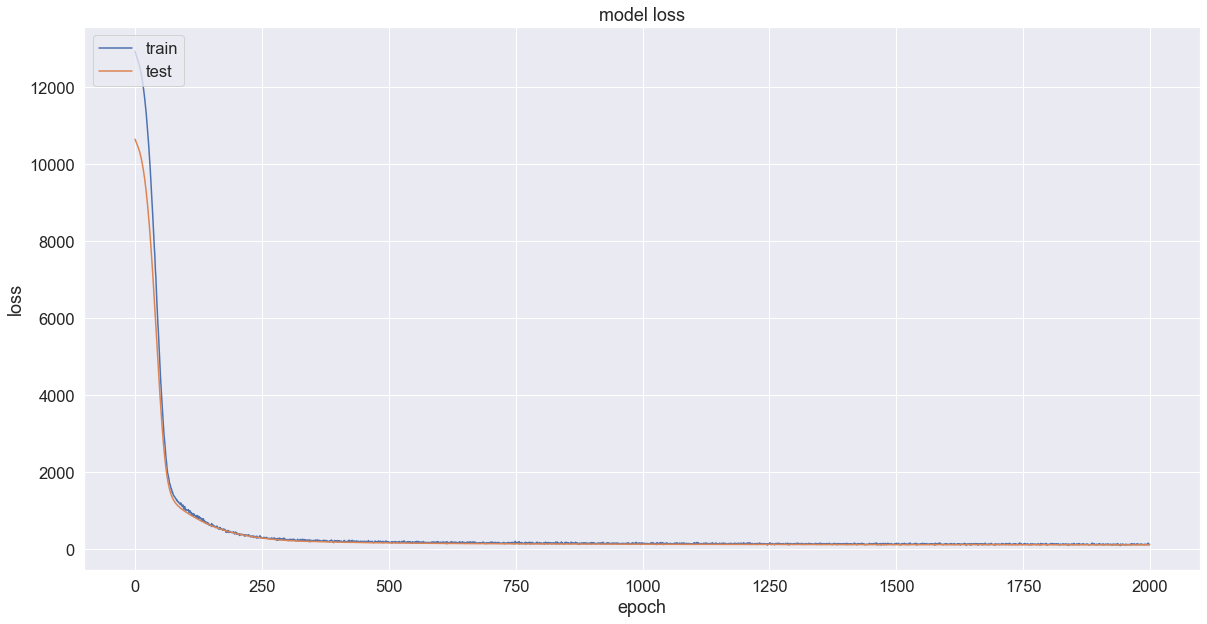

In [96]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
